<a href="https://www.kaggle.com/code/rautaishwarya/co2-emission-prediction?scriptVersionId=140101442" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


**Title: Predicting CO2 Emissions in Rwanda**

**Introduction:**

In an era characterized by the increasing concern for environmental sustainability, predicting and managing carbon dioxide (CO2) emissions has become a pivotal challenge for governments, industries, and researchers alike. With the pressing need to transition to more eco-friendly practices, accurate prediction models can play a crucial role in shaping policies and strategies to mitigate the adverse impacts of greenhouse gas emissions.

This Kaggle competition offers an exciting opportunity for data scientists and machine learning enthusiasts to engage in a real-world problem. The challenge centers around predicting CO2 emissions in Rwanda, a nation that has been actively pursuing a greener future through a series of environmental initiatives and policies. The competition provides participants with a curated dataset containing historical emission data, geographical attributes, and contextual variables.

Participants are tasked with constructing robust prediction models capable of estimating CO2 emissions in Rwanda. The competition promotes the application of advanced machine learning techniques, such as regression algorithms and ensemble methods, to harness the intricate relationships between various input features and emission outputs. The outcome of this competition is not only about securing a winning position but also contributing to the global efforts to combat climate change.

**Objectives:**

The primary objectives of this Kaggle competition are as follows:

1. **Predictive Accuracy:** Develop accurate prediction models that can estimate CO2 emissions in Rwanda based on historical and contextual data.

2. **Feature Engineering:** Explore and engineer relevant features that capture the complex interplay of variables affecting emissions, considering factors like geography, time, and socioeconomic indicators.

3. **Model Selection:** Identify and utilize appropriate regression algorithms, machine learning models, and ensemble techniques to achieve the best prediction performance.

4. **Interpretability:** Gain insights into the contributing factors influencing emissions through model interpretation, allowing stakeholders to make informed decisions.

5. **Impact:** Contribute to the broader objective of environmental sustainability by providing policymakers with tools for informed decision-making in the context of emissions reduction strategies.

**Data Description:**

The dataset provided for this competition includes historical CO2 emissions data from Rwanda, alongside various features that might influence emissions. These features encompass geographical information, temporal data, economic indicators, and potentially other context-specific attributes.

Participants are encouraged to conduct exploratory data analysis to gain a comprehensive understanding of the dataset's characteristics. Furthermore, the application of feature engineering techniques and thoughtful preprocessing strategies will be essential to extract meaningful information from the raw data.

# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import geopandas as gpd
from geopy.geocoders import Nominatim
import math
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import ExtraTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

# Set options for displaying DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Train Dataset
train= pd.read_csv("/kaggle/input/playground-series-s3e20/train.csv")
train.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.255668                           -98.593887   
1                       0.130988                            16.592861   
2                       0.110018                            72.795837   
3                            NaN                                  NaN   
4                       0.121164                             4.121269   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                           50.843559                         -130.050797   
1                           39.137194                         -140.874435   
2                           52.868816                         -150.191757   
3                                 NaN                                 NaN   
4                           35.515587                         -137.409159   

   SulphurDioxide_solar_zenith_angle  \
0                          35.874496   
1                          28.965133   
2                          23.206415   
3                                NaN   
4                          24.331972   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                      -0.000027   
1                                       0.000012   
2                                       0.000154   
3                                            NaN   
4                                      -0.000028   

   CarbonMonoxide_CO_column_number_density  \
0                                 0.035370   
1                                 0.036526   
2                                 0.035338   
3                                 0.036790   
4                                 0.034675   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                               1589.024536                  4061.098145   
1                               1772.574405                  1869.040414   
2                               2703.236800                  2809.138386   
3                               2076.073332                  3917.707873   
4                               2053.608490                  2667.310013   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                   829530.500000                            71.111977   
1                   829787.287130                            -1.019594   
2                   829883.828686                           -54.801144   
3                   829657.163571                            28.916541   
4                   829735.093750                           -12.501663   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_

In [4]:
# Test Dataset
test=pd.read_csv("/kaggle/input/playground-series-s3e20/test.csv")
test.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2022_00     -0.51      29.29  2022        0   
1  ID_-0.510_29.290_2022_01     -0.51      29.29  2022        1   
2  ID_-0.510_29.290_2022_02     -0.51      29.29  2022        2   
3  ID_-0.510_29.290_2022_03     -0.51      29.29  2022        3   
4  ID_-0.510_29.290_2022_04     -0.51      29.29  2022        4   

   SulphurDioxide_SO2_column_number_density  \
0                                       NaN   
1                                  0.000456   
2                                  0.000161   
3                                  0.000350   
4                                 -0.000317   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                           NaN   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                             NaN   
1                                        0.000316   
2                                        0.000106   
3                                        0.000243   
4                                       -0.000184   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                            NaN                                  NaN   
1                       0.000000                            76.239196   
2                       0.079870                           -42.055341   
3                       0.201028                            72.169566   
4                       0.204352                            76.190865   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                                 NaN                                 NaN   
1                           15.600607                         -140.529848   
2                           39.889060                         -136.908976   
3                           58.862543                         -152.999440   
4                           15.646016                         -135.794754   

   SulphurDioxide_solar_zenith_angle  \
0                                NaN   
1                          28.896124   
2                          30.054682   
3                          21.806625   
4                          24.328299   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                            NaN   
1                                       0.000157   
2                                       0.000053   
3                                       0.000093   
4                                      -0.000077   

   CarbonMonoxide_CO_column_number_density  \
0                                      NaN   
1                                 0.037641   
2                                 0.037795   
3                                 0.039743   
4                                 0.039232   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                                       NaN                          NaN   
1                               1688.656342                  2814.309683   
2                               2629.692089                  3233.654973   
3                               1905.403107                  3157.021515   
4                               1307.190702                  2228.402754   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                             NaN                                  NaN   
1                   829652.957598                            26.072167   
2                   829589.971617                            14.881259   
3                   829691.671875                           -12.772312   
4                   829847.718216                           -40.978057   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      24353 non-null  object 
 1   latitude                                                  24353 non-null  float64
 2   longitude                                                 24353 non-null  float64
 3   year                                                      24353 non-null  int64  
 4   week_no                                                   24353 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  18211 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              18211 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            18211 non-null  float64
 8   SulphurDioxide_c

In [7]:
train.describe().T

count           mean  \
latitude                                            79023.0      -1.891072   
longitude                                           79023.0      29.880155   
year                                                79023.0    2020.000000   
week_no                                             79023.0      26.000000   
SulphurDioxide_SO2_column_number_density            64414.0       0.000048   
SulphurDioxide_SO2_column_number_density_amf        64414.0       0.834848   
SulphurDioxide_SO2_slant_column_number_density      64414.0       0.000035   
SulphurDioxide_cloud_fraction                       64414.0       0.158418   
SulphurDioxide_sensor_azimuth_angle                 64414.0      -7.925870   
SulphurDioxide_sensor_zenith_angle                  64414.0      37.436189   
SulphurDioxide_solar_azimuth_angle                  64414.0     -83.833174   
SulphurDioxide_solar_zenith_angle                   64414.0      27.722311   
SulphurDioxide_SO2_column_number_density_15km       64414.0       0.000015   
CarbonMonoxide_CO_column_number_density             76901.0       0.033158   
CarbonMonoxide_H2O_column_number_density            76901.0    2113.906233   
CarbonMonoxide_cloud_height                         76901.0    2821.590722   
CarbonMonoxide_sensor_altitude                      76901.0  829938.633762   
CarbonMonoxide_sensor_azimuth_angle                 76901.0      -7.331051   
CarbonMonoxide_sensor_zenith_angle                  76901.0      37.846794   
CarbonMonoxide_solar_azimuth_angle                  76901.0     -86.049580   
CarbonMonoxide_solar_zenith_angle                   76901.0      27.767024   
NitrogenDioxide_NO2_column_number_density           60703.0       0.000044   
NitrogenDioxide_tropospheric_NO2_column_number_...  60703.0       0.000012   
NitrogenDioxide_stratospheric_NO2_column_number...  60703.0       0.000032   
NitrogenDioxide_NO2_slant_column_number_density     60703.0       0.000097   
NitrogenDioxide_tropopause_pressure                 60703.0    8922.568995   
NitrogenDioxide_absorbing_aerosol_index             60703.0      -1.812155   
NitrogenDioxide_cloud_fraction                      60703.0       0.097008   
NitrogenDioxide_sensor_altitude                     60703.0  829994.224471   
NitrogenDioxide_sensor_azimuth_angle                60703.0     -15.937696   
NitrogenDioxide_sensor_zenith_angle                 60703.0      36.852637   
NitrogenDioxide_solar_azimuth_angle                 60703.0     -84.260082   
NitrogenDioxide_solar_zenith_angle                  60703.0      28.316388   
Formaldehyde_tropospheric_HCHO_column_number_de...  71746.0       0.000127   
Formaldehyde_tropospheric_HCHO_column_number_de...  71746.0       1.254134   
Formaldehyde_HCHO_slant_column_number_density       71746.0       0.000084   
Formaldehyde_cloud_fraction                         71746.0       0.228801   
Formaldehyde_solar_zenith_angle                     71746.0      27.887813   
Formaldehyde_solar_azimuth_angle                    71746.0     -84.605844   
Formaldehyde_sensor_zenith_angle                    71746.0      40.478057   
Formaldehyde_sensor_azimuth_angle                   71746.0      -9.396089   
UvAerosolIndex_absorbing_aerosol_index              78484.0      -1.342787   
UvAerosolIndex_sensor_altitude                      78484.0  829974.542096   
UvAerosolIndex_sensor_azimuth_angle                 78484.0     -12.739997   
UvAerosolIndex_sensor_zenith_angle                  78484.0      39.962875   
UvAerosolIndex_solar_azimuth_angle                  78484.0     -86.548895   
UvAerosolIndex_solar_zenith_angle                   78484.0      28.052553   
Ozone_O3_column_number_density                      78475.0       0.117343   
Ozone_O3_column_number_density_amf                  78475.0       2.609890   
Ozone_O3_slant_column_number_density                78475.0       0.310802   
Ozone_O3_effective_temperature                      78475.0     228.625917  

## Enhancing Feature Engineering

Upon careful examination of the train dataset description, it is evident that the dataset contains important variables such as Year and week_no. In order to augment the predictive capabilities of our model, let's embark on creating additional features. Specifically, we'll engineer the Date and Month features, which can provide valuable temporal insights into the data.

Let's delve into the process of crafting these features and observe how they contribute to enhancing our model's predictive prowess.

In [8]:
def extract_date(df):
    df["Date"]=pd.to_datetime(df.year,format='%Y')+pd.to_timedelta(df.week_no.mul(7),unit="days")
    df["Month"]=df["Date"].dt.month
    return df["Date"], df["Month"]


extract_date(train)
extract_date(test)
print("---Done with Dates---")

---Done with Dates---


## Adding Coordinates Feature

In order to enhance our dataset's feature set, we will be introducing a new feature called "coordinates." This feature will encapsulate the geographical information present in the "latitude" and "longitude" columns of our dataset.

In [9]:
def coordinates(df):
    df["coordinates"]="("+df["latitude"].astype(str)+","+df["longitude"].astype(str)+")"
    return df["coordinates"]

coordinates(train)
coordinates(test)
print("---Done with Coordinates---")

---Done with Coordinates---


In [10]:
print("Year in train data : ",train.year.unique())
print("Year in test data : ",test.year.unique())

geopair_train=train["coordinates"].drop_duplicates().to_numpy()
geopair_test=test["coordinates"].drop_duplicates().to_numpy()

print("Unique geo location for train data: ",len(geopair_train))
print("Unique geo location for test data: ",len(geopair_test))

Year in train data :  [2019 2020 2021]
Year in test data :  [2022]
Unique geo location for train data:  497
Unique geo location for test data:  497


In train dataset we have emission data from year 2019 to 2021 and in test data we have data of yeat 2022. 
The data is from 497 unique geo location.

## Missing Data Check

In [11]:
Missing_data = pd.DataFrame(index=test.columns)

Missing_data["Missing_train"] = train.isnull().sum()
Missing_data["%_in_missing_train"] = ((Missing_data["Missing_train"] / len(train)) * 100).round(2).astype(str) + "%"

Missing_data["Missing_test"] = test.isnull().sum()
Missing_data["%_in_missing_test"] = ((Missing_data["Missing_test"] / len(train)) * 100).round(2).astype(str) + "%"

Missing_data

Missing_train  \
ID_LAT_LON_YEAR_WEEK                                            0   
latitude                                                        0   
longitude                                                       0   
year                                                            0   
week_no                                                         0   
SulphurDioxide_SO2_column_number_density                    14609   
SulphurDioxide_SO2_column_number_density_amf                14609   
SulphurDioxide_SO2_slant_column_number_density              14609   
SulphurDioxide_cloud_fraction                               14609   
SulphurDioxide_sensor_azimuth_angle                         14609   
SulphurDioxide_sensor_zenith_angle                          14609   
SulphurDioxide_solar_azimuth_angle                          14609   
SulphurDioxide_solar_zenith_angle                           14609   
SulphurDioxide_SO2_column_number_density_15km               14609   
CarbonMonoxide_CO_column_number_density                      2122   
CarbonMonoxide_H2O_column_number_density                     2122   
CarbonMonoxide_cloud_height                                  2122   
CarbonMonoxide_sensor_altitude                               2122   
CarbonMonoxide_sensor_azimuth_angle                          2122   
CarbonMonoxide_sensor_zenith_angle                           2122   
CarbonMonoxide_solar_azimuth_angle                           2122   
CarbonMonoxide_solar_zenith_angle                            2122   
NitrogenDioxide_NO2_column_number_density                   18320   
NitrogenDioxide_tropospheric_NO2_column_number_...          18320   
NitrogenDioxide_stratospheric_NO2_column_number...          18320   
NitrogenDioxide_NO2_slant_column_number_density             18320   
NitrogenDioxide_tropopause_pressure                         18320   
NitrogenDioxide_absorbing_aerosol_index                     18320   
NitrogenDioxide_cloud_fraction                              18320   
NitrogenDioxide_sensor_altitude                             18320   
NitrogenDioxide_sensor_azimuth_angle                        18320   
NitrogenDioxide_sensor_zenith_angle                         18320   
NitrogenDioxide_solar_azimuth_angle                         18320   
NitrogenDioxide_solar_zenith_angle                          18320   
Formaldehyde_tropospheric_HCHO_column_number_de...           7277   
Formaldehyde_tropospheric_HCHO_column_number_de...           7277   
Formaldehyde_HCHO_slant_column_number_density                7277   
Formaldehyde_cloud_fraction                                  7277   
Formaldehyde_solar_zenith_angle                              7277   
Formaldehyde_solar_azimuth_angle                             7277   
Formaldehyde_sensor_zenith_angle                             7277   
Formaldehyde_sensor_azimuth_angle                            7277   
UvAerosolIndex_absorbing_aerosol_index                        539   
UvAerosolIndex_sensor_altitude                                539   
UvAerosolIndex_sensor_azimuth_angle                           539   
UvAerosolIndex_sensor_zenith_angle                            539   
UvAerosolIndex_solar_azimuth_angle                            539   
UvAerosolIndex_solar_zenith_angle                             539   
Ozone_O3_column_number_density                                548   
Ozone_O3_column_number_density_amf                            548   
Ozone_O3_slant_column_number_density                          548   
Ozone_O3_effective_temperature                                548   
Ozone_cloud_fraction                                          548   
Ozone_sensor_azimuth_angle                                    548   
Ozone_sensor_zenith_angle                                     548   
Ozone_solar_azimuth_angle                                     548   
Ozone_solar_zenith_angle                                      548   
UvAerosolLayerHeight_aerosol_height               

From the above Missing_data table, we can see that, the feature starts with "UvAerosolLayerHeight" has 99.44% missing values. So it's better to drop this features.

In [12]:
def drop_col(df):
    col=df.columns[df.columns.str.startswith("UvAerosolLayer")]
    df=df.drop(columns=col,axis=1,inplace=True)
    return df

drop_col(train)
drop_col(test)
print("--- Done with Droping Columns")

print("After Droping Columns Shape of Train Data : ",train.shape)
print("After Droping Columns Shape of Test Data : ",test.shape)

--- Done with Droping Columns
After Droping Columns Shape of Train Data :  (79023, 72)
After Droping Columns Shape of Test Data :  (24353, 71)


## Emission by Location

In [13]:
mean_emission = train["emission"].mean()
fig = px.violin(
    train,
    y="emission",
    x="coordinates",
    hover_data=["emission", "coordinates"],
    labels={"emission": "Emission", "coordinates": "Coordinates"},
    title="Violin Plot of Emission by Coordinates",
)


fig.update_layout(
    xaxis_title="Emission",
    yaxis_title="Count",
    showlegend=False
)

fig.show()


From violin plot, there is two coordinates which shows more emission than usual. Also if we carefully notic that there are more coordinates which are too close to zero emission plot or zero emission. 

Let's first look at Zero emission coordinate location.

In [14]:
train_coords = train.drop_duplicates(subset=['latitude', 'longitude'])

zero_emission_coords = train_coords[train_coords["emission"] == 0]

geometry = gpd.points_from_xy(zero_emission_coords.longitude, zero_emission_coords.latitude)
geo_df = gpd.GeoDataFrame(zero_emission_coords[["latitude", "longitude", "emission"]], geometry=geometry)

zero_emission_map = folium.Map(location=[34.0522, -118.2437], zoom_start=5) 


for idx, row in geo_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Emissions: {row['emission']}"
    ).add_to(zero_emission_map)

zero_emission_map.fit_bounds(zero_emission_map.get_bounds())

zero_emission_map


There are 15 location which has zero emission, which display on the above plot. As we can see that location plot are forest points.

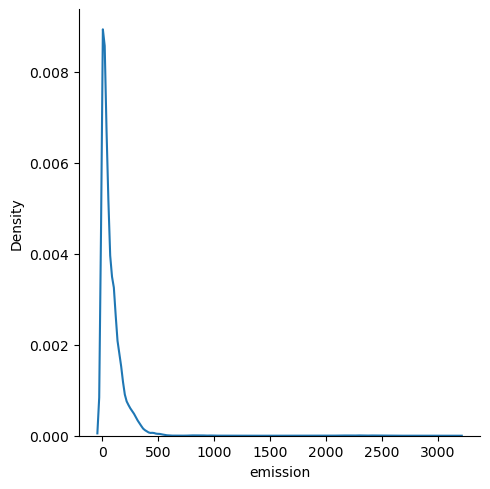

In [15]:
# Display displot for target variable.
sns.displot(data=train,x="emission",kind="kde")
plt.show()

The emission feature has left skewed data. More emission density is between 0-500.

Now let's create a map for all locations. The Red bubbles represent zero emission location and Purple bubbles represent emission points. The bubble size is varies based on emission values. 

In [16]:
train_coords = train.drop_duplicates(subset=['latitude', 'longitude'])

geometry = gpd.points_from_xy(train_coords.longitude, train_coords.latitude)
geo_df = gpd.GeoDataFrame(train_coords[["latitude", "longitude", "emission"]], geometry=geometry)

geo_df = geo_df.sort_values(by='emission')

# Create a map centered around a location
all_data_map = folium.Map(location=[34.0522, -118.2437], zoom_start=5)  
max_emissions = geo_df['emission'].max()

# Create a geometry list from the GeoDataFrame
for idx, row in geo_df.iterrows():
    marker_size = row['emission'] / max_emissions * 50
    if row['emission'] == 0:
        marker_color = "red"
    else:
        marker_color = "purple"

    all_data_map.add_child(
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=marker_size,
            weight=1,
            color=marker_color,
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.5,
            popup=f"Emissions: {row['emission']}",
        )
    )

all_data_map.fit_bounds(all_data_map.get_bounds())

# Display the map
all_data_map


Let's identify the location which has emission more than 500.

In [17]:
country_list=train[train["emission"]>500]

known_latitudes = country_list["latitude"].unique()
known_longitudes = country_list["longitude"].unique()

# Initialize the geocoder
geolocator = Nominatim(user_agent="my_app")

known_location_names = []

# Iterate through known latitude and longitude pairs
for latitude, longitude in zip(known_latitudes, known_longitudes):
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    
    if location:
        address = location.raw.get('address', {})
        city = address.get('city', None)
        country = address.get('country', None)
        
        if city:
            location_name = city
        elif country:
            location_name = country
        else:
            location_name = 'Location not found'
        
        known_location_names.append(location_name)
    else:
        known_location_names.append('Location not found')

# Create a DataFrame for known locations
known_locations_df = pd.DataFrame({'latitude': known_latitudes, 'longitude': known_longitudes, 'location_name': known_location_names})

known_locations_df

latitude  longitude location_name
0     -0.956     30.744        Uganda
1     -1.346     31.254      Tanzania
2     -1.486     29.614       Musanze
3     -1.514     29.686        Gagaca
4     -1.889     29.611      Muhororo
5     -2.079     29.321        Rwanda
6     -2.293     29.507        Mugano
7     -2.300     29.200        Macuba
8     -2.376     29.924      Kibirizi
9     -2.378     29.222         Cyato
10    -2.441     28.959        Giheke
11    -2.599     29.801         Ndora

In [18]:
known_locations = known_locations_df

coordinates_to_names = dict(zip(
    zip(known_locations['latitude'], known_locations['longitude']),
    known_locations['location_name']
))

def get_location_name(coordinates):
    return coordinates_to_names.get(coordinates, 'Unknown')

# Use the map function to apply the function to latitude and longitude columns
country_list['location_name'] = country_list.apply(lambda row: get_location_name((row['latitude'], row['longitude'])), axis=1)

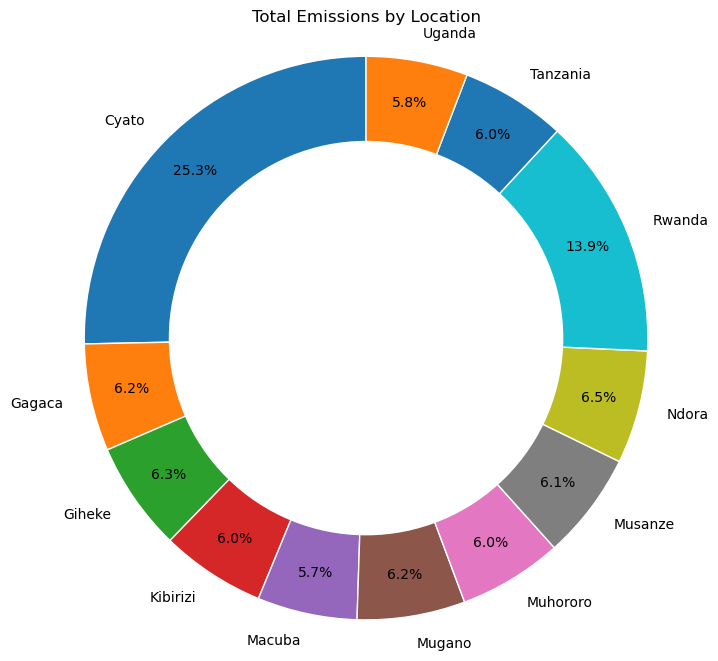

In [19]:
country_emission = country_list.groupby("location_name")["emission"].mean()

fig, ax = plt.subplots(figsize=(8, 8))  

ax.pie(country_emission, labels=country_emission.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops={'edgecolor': 'white'})
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)
ax.axis('equal')  
plt.title("Total Emissions by Location")
ax.set_xticks([]) 
plt.show()

"Cryto" and "Rwanda" covers 25.3% and 13.9% emission. Combine both location covers nearly 39.2% CO2 emission.

Let's take a look on the Average CO2 emission over years with whole data and without "Cryto" and "Rwanda".

In [20]:
# Emission over the year with and without two highest emission location
exclude_coordinates = [(-2.079, 29.321), (-2.378, 29.222)]
filtered_train = train[~train[['latitude', 'longitude']].apply(tuple, axis=1).isin(exclude_coordinates)]

# Calculate the mean emission for the entire dataset
mean_emission_total = train.groupby('Date')['emission'].mean().reset_index()

# Calculate the mean emission for the filtered dataset (excluding specific coordinates)
mean_emission_filtered = filtered_train.groupby('Date')['emission'].mean().reset_index()

# Create line plots for mean emissions over time
fig = px.line(
    mean_emission_total,
    x='Date',
    y='emission',
    title='Mean Emissions Over Time (Whole Dataset)',
    labels={'date': 'Date', 'emission': 'Mean Emission'},
    line_shape="linear",  # Change line shape to linear
    line_dash_sequence=["solid"],  # Set line style to solid
    color_discrete_sequence=["blue"],  # Set line color
)

fig.add_trace(
    px.line(
        mean_emission_filtered,
        x='Date',
        y='emission',
        title='Mean Emissions Over Time (Excluding Specific Coordinates)',
        labels={'date': 'Date', 'emission': 'Mean Emission'},
        line_shape="linear",
        line_dash_sequence=["dash"],
        color_discrete_sequence=["red"],
    ).data[0]
)

# Add color legend
fig.update_layout(legend_title_text='Legend', legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

# Show the plots
fig.show()


Let's analyse the other features from train and test data.

In [21]:
train_SulphurDioxide=train[[col for col in train.columns if col.startswith("SulphurDioxide")]]
test_SulphurDioxide=test[[col for col in test.columns if col.startswith("SulphurDioxide")]]

train_CarbonMonoxide=train[[col for col in train.columns if col.startswith("CarbonMonoxide")]]
test_CarbonMonoxide=test[[col for col in test.columns if col.startswith("CarbonMonoxide")]]

train_NitrogenDioxide=train[[col for col in train.columns if col.startswith("NitrogenDioxide")]]
test_NitrogenDioxide=test[[col for col in test.columns if col.startswith("NitrogenDioxide")]]

train_Formaldehyde=train[[col for col in train.columns if col.startswith("Formaldehyde")]]
test_Formaldehyde=test[[col for col in test.columns if col.startswith("Formaldehyde")]]

train_Ozone=train[[col for col in train.columns if col.startswith("Ozone")]]
test_Ozone=test[[col for col in test.columns if col.startswith("Ozone")]]

train_Cloud=train[[col for col in train.columns if col.startswith("Cloud")]]
test_Cloud=test[[col for col in test.columns if col.startswith("Cloud")]]

In [22]:
def plot_kde_subplots(a, b):
    num_columns = len(a.columns)
    
    num_rows = math.ceil(num_columns / 3)
    num_cols = 3 if num_columns > 1 else 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    
    if num_rows > 1:
        axes = axes.flatten()
    
    for idx, (i, j) in enumerate(zip(a.columns, b.columns)):
        ax = axes[idx]
        sns.kdeplot(data=a, x=i, color="blue", label="Train", ax=ax)
        sns.kdeplot(data=b, x=j, color="orange", label="Test", ax=ax)
    
        ax.set_title(f"Distribution of {i}")
        ax.set_xlabel(i)
        ax.set_ylabel("Density")
        ax.legend()
    
    for i in range(num_columns, num_rows * num_cols):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

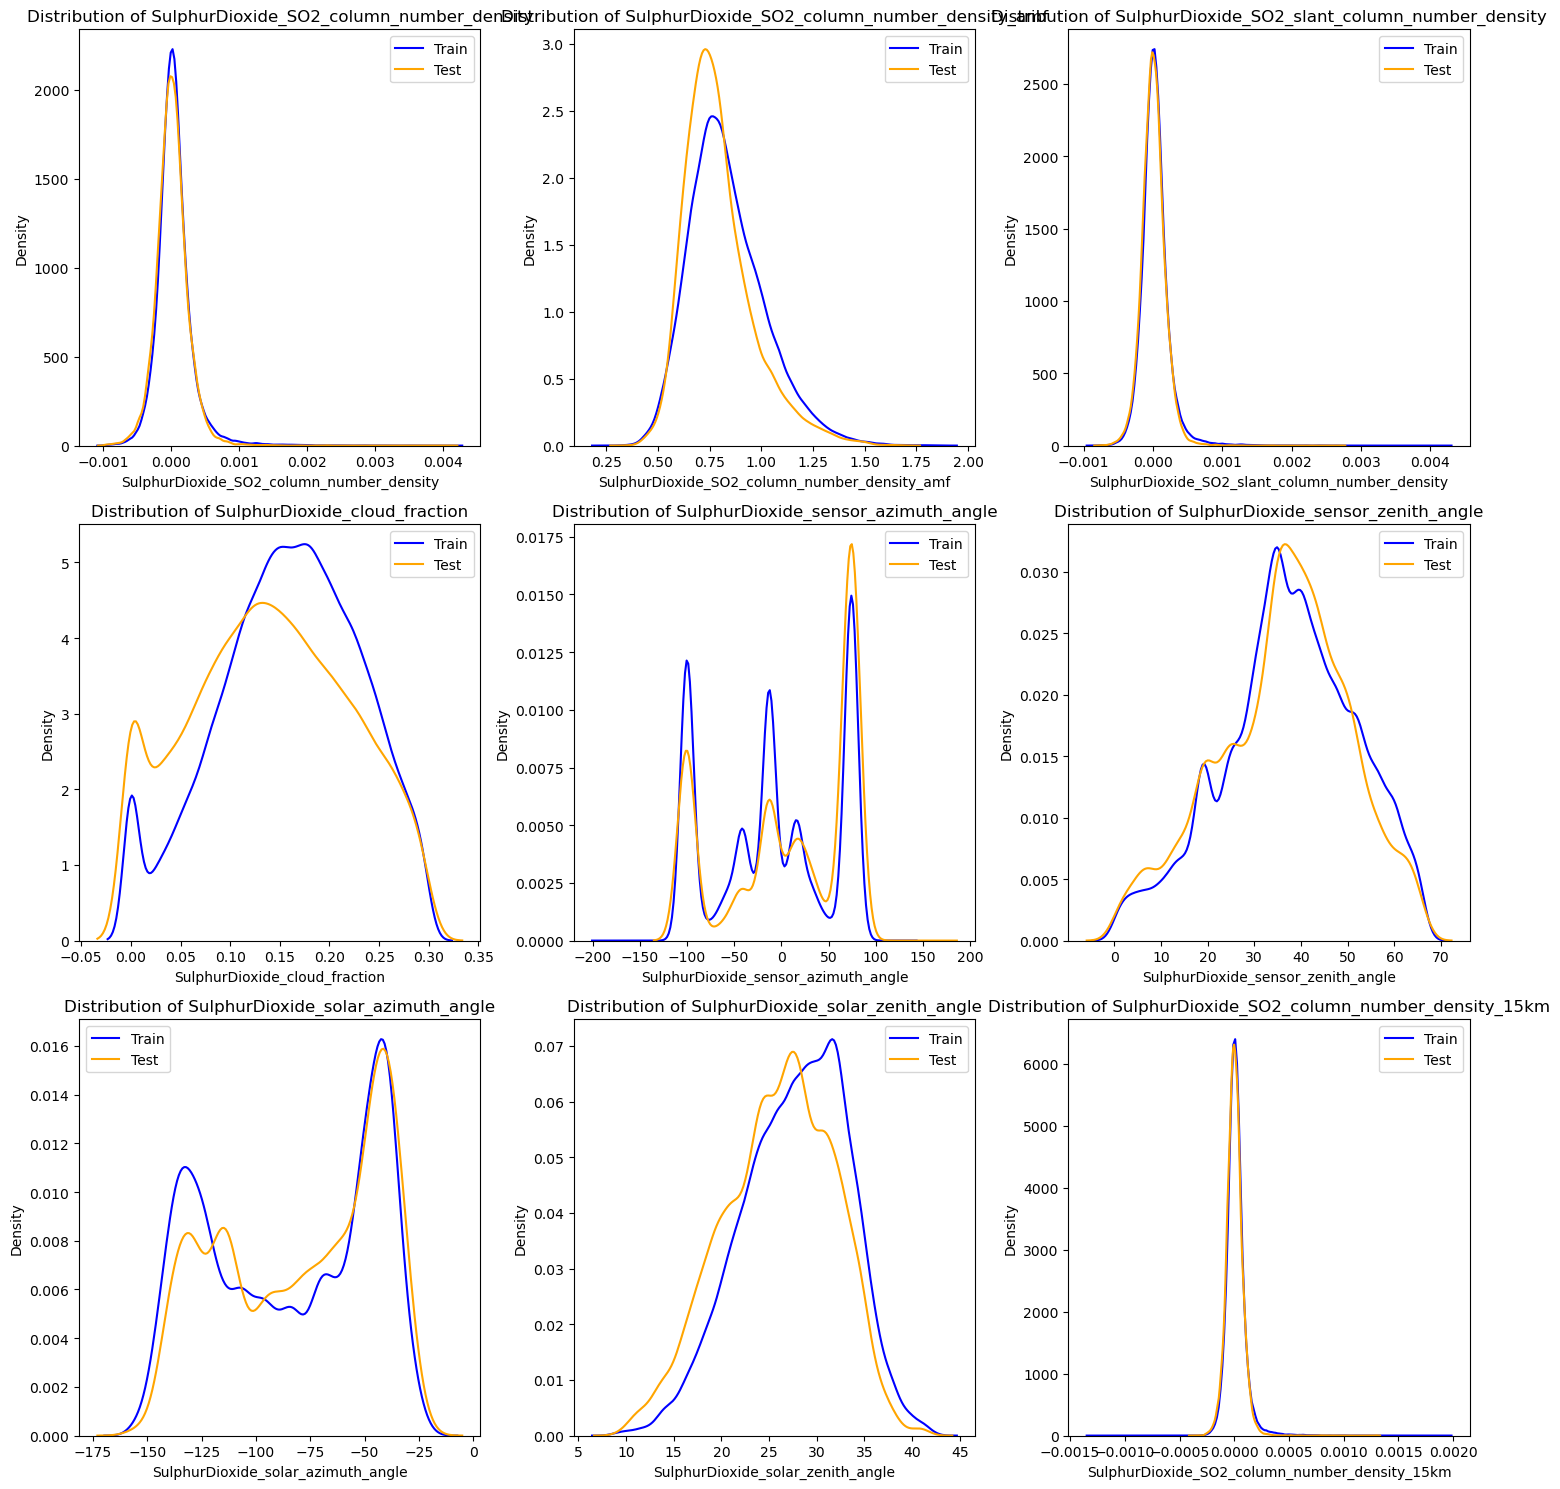

In [23]:
plot_kde_subplots(train_SulphurDioxide, test_SulphurDioxide)

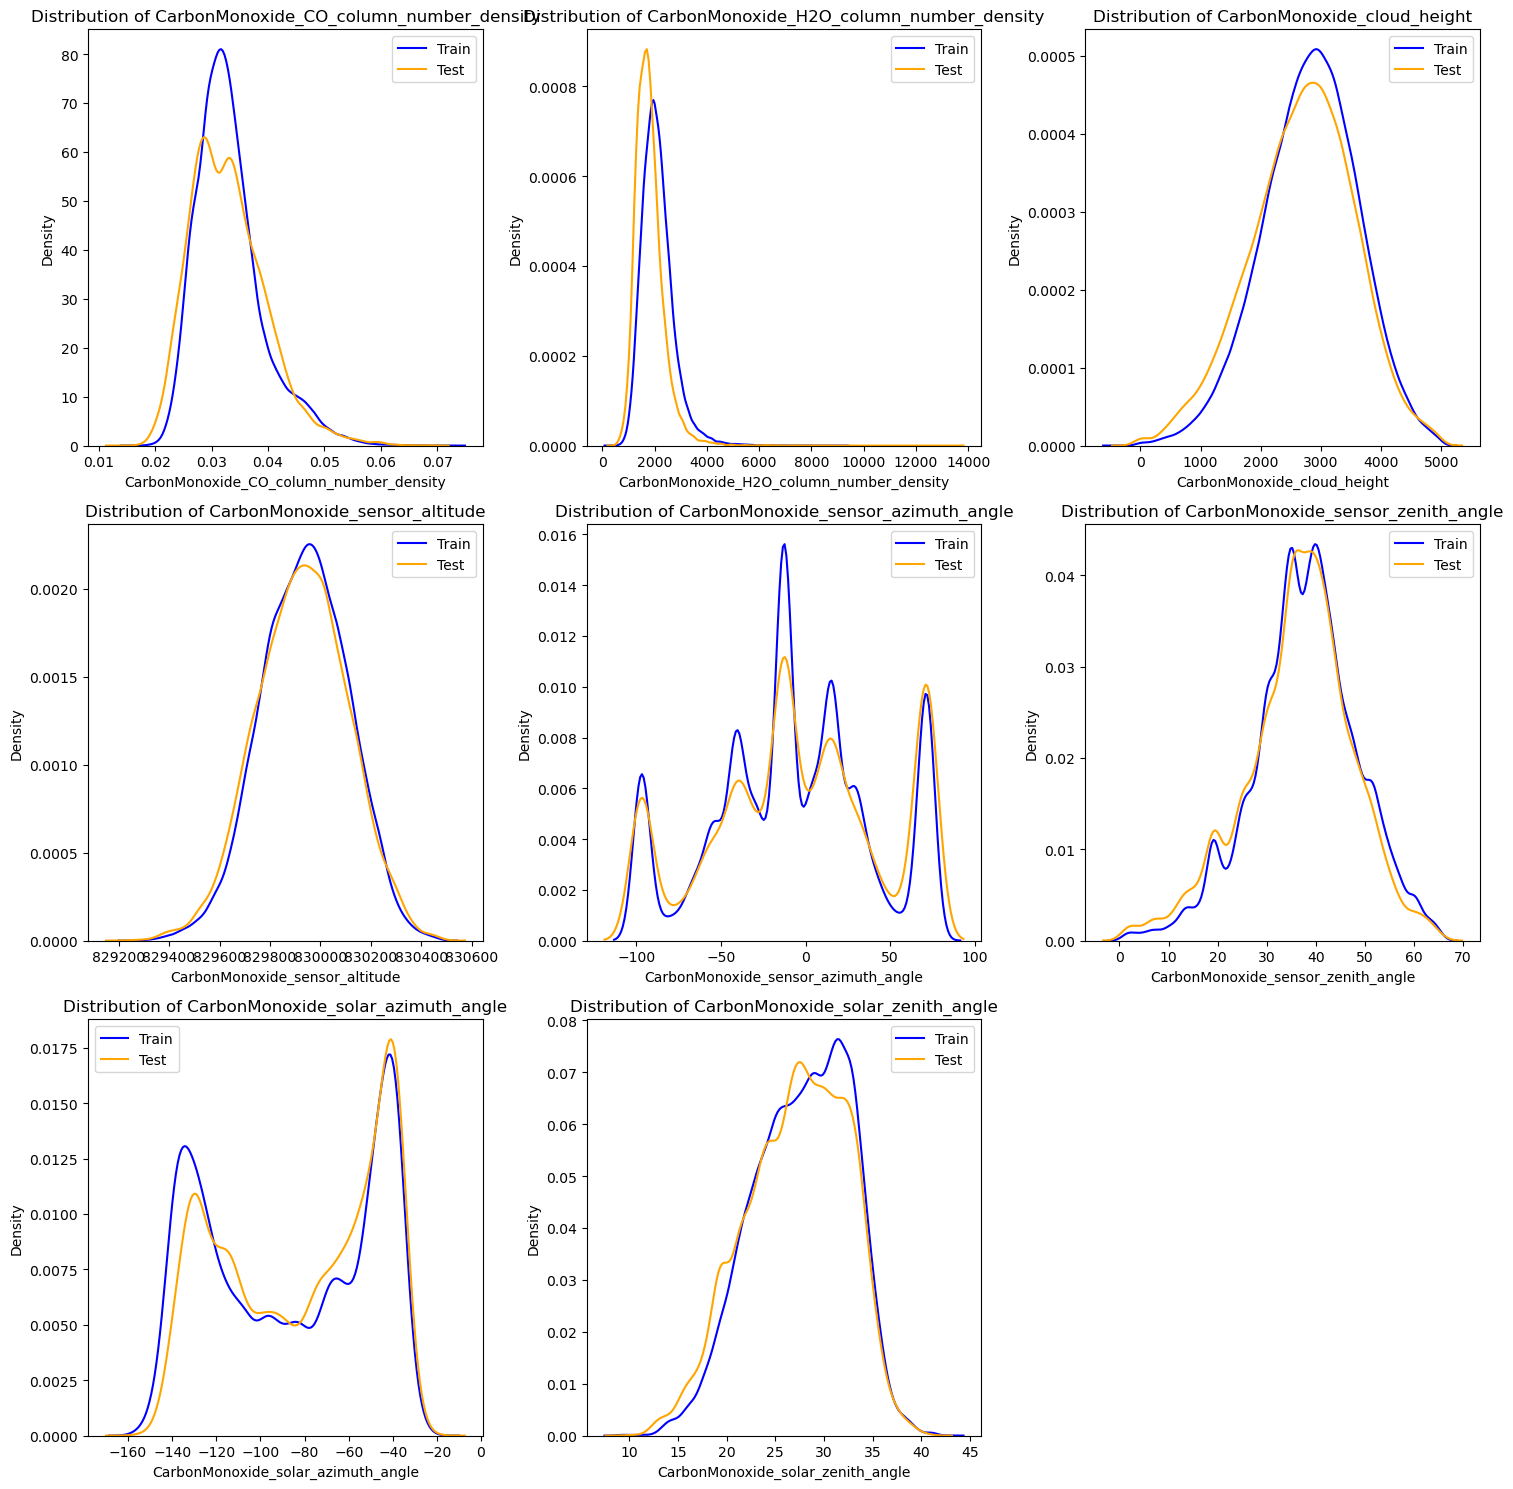

In [24]:
plot_kde_subplots(train_CarbonMonoxide, test_CarbonMonoxide)

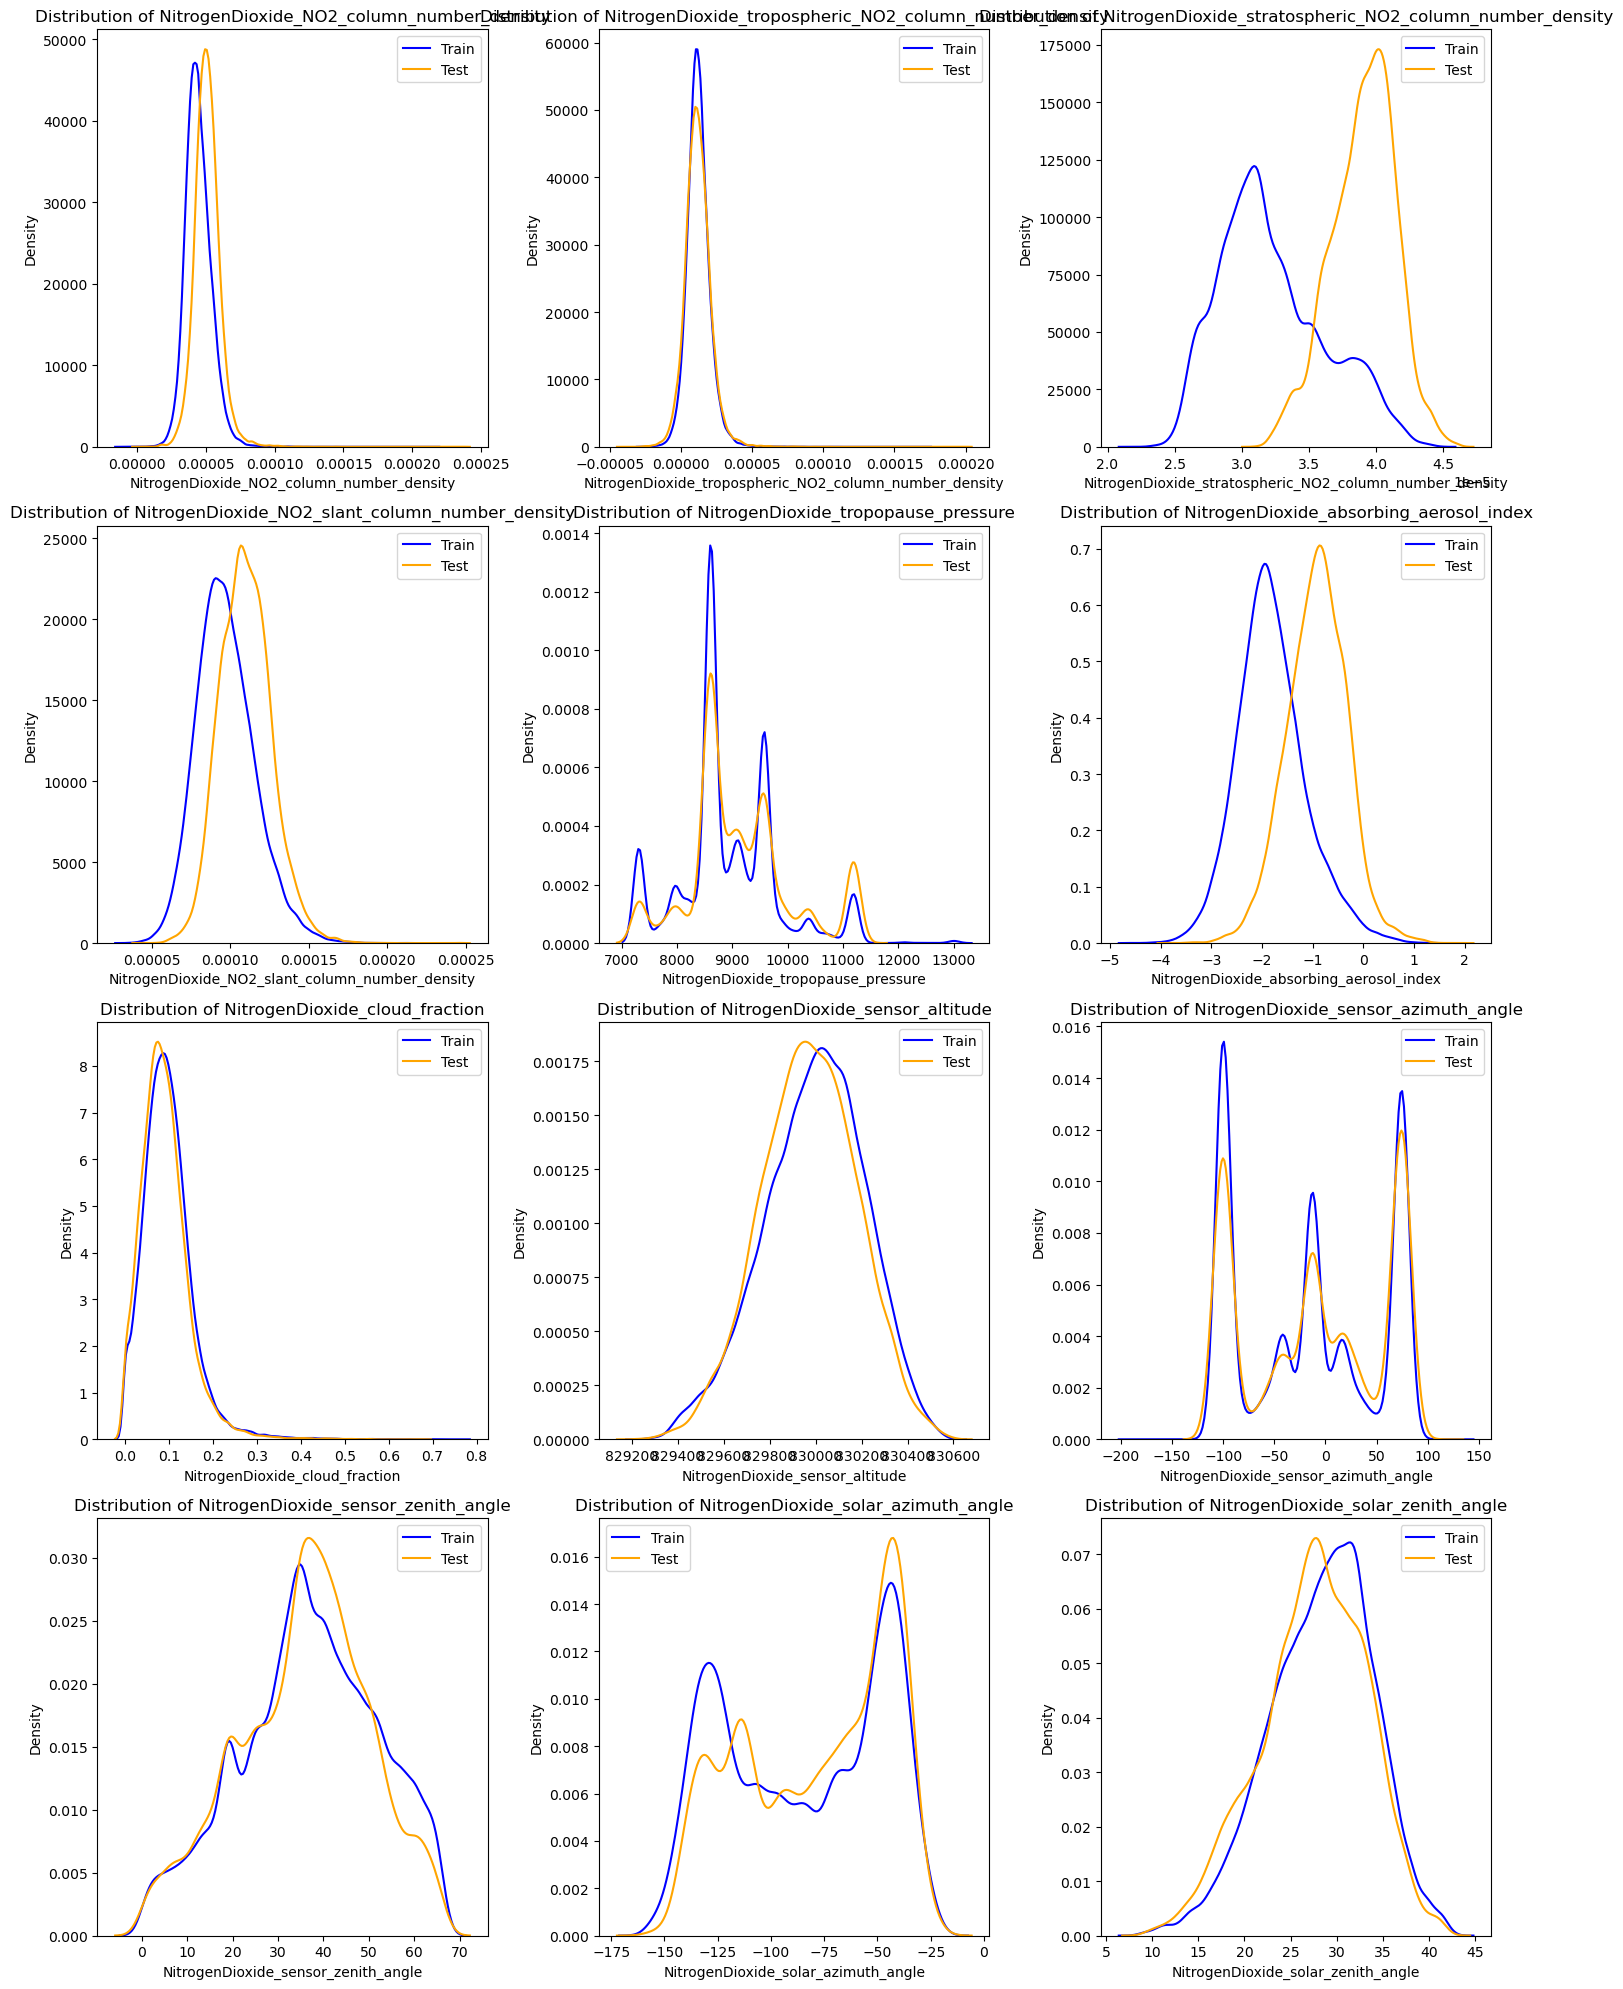

In [25]:
plot_kde_subplots(train_NitrogenDioxide, test_NitrogenDioxide)

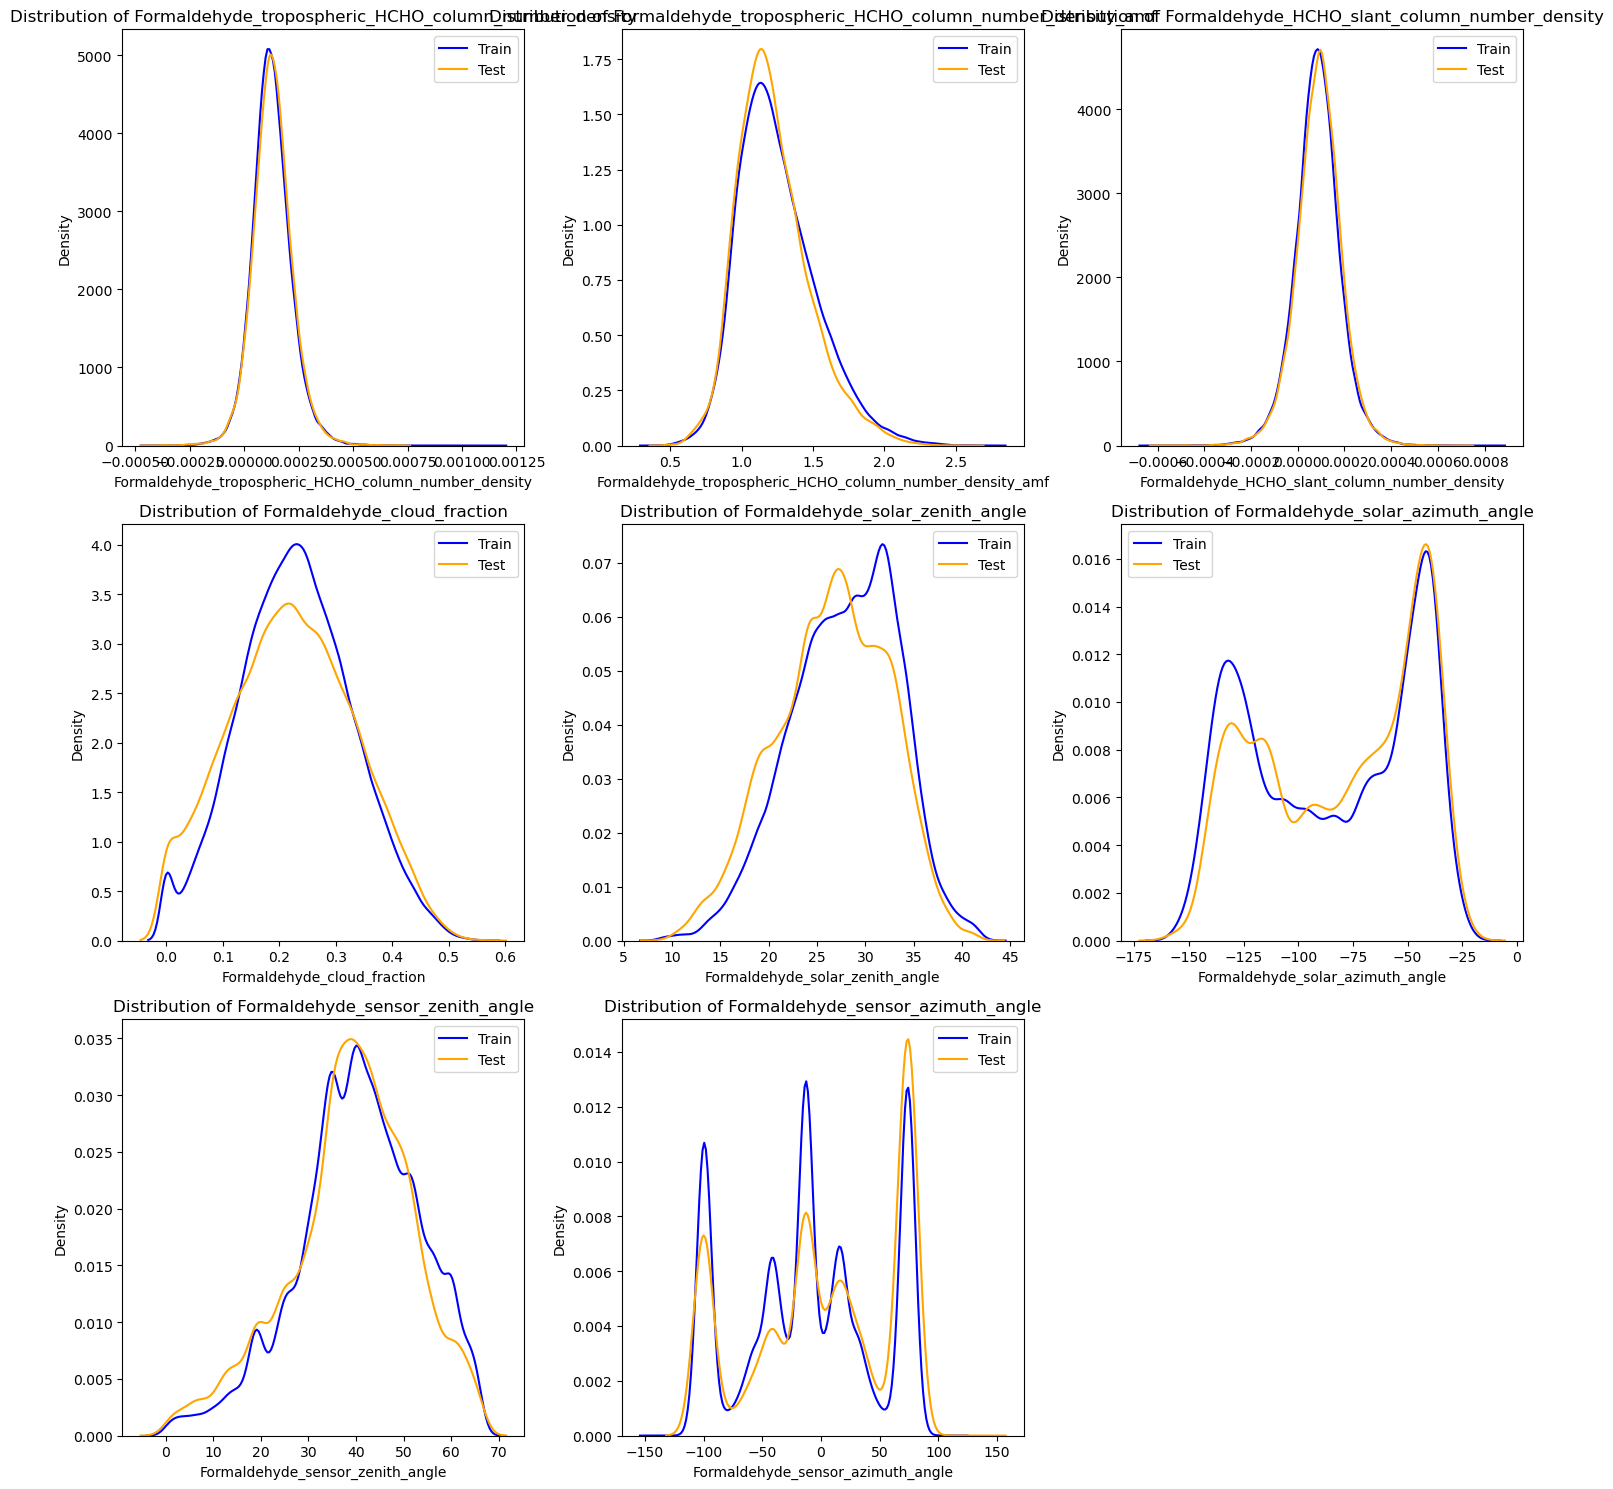

In [26]:
plot_kde_subplots(train_Formaldehyde, test_Formaldehyde)

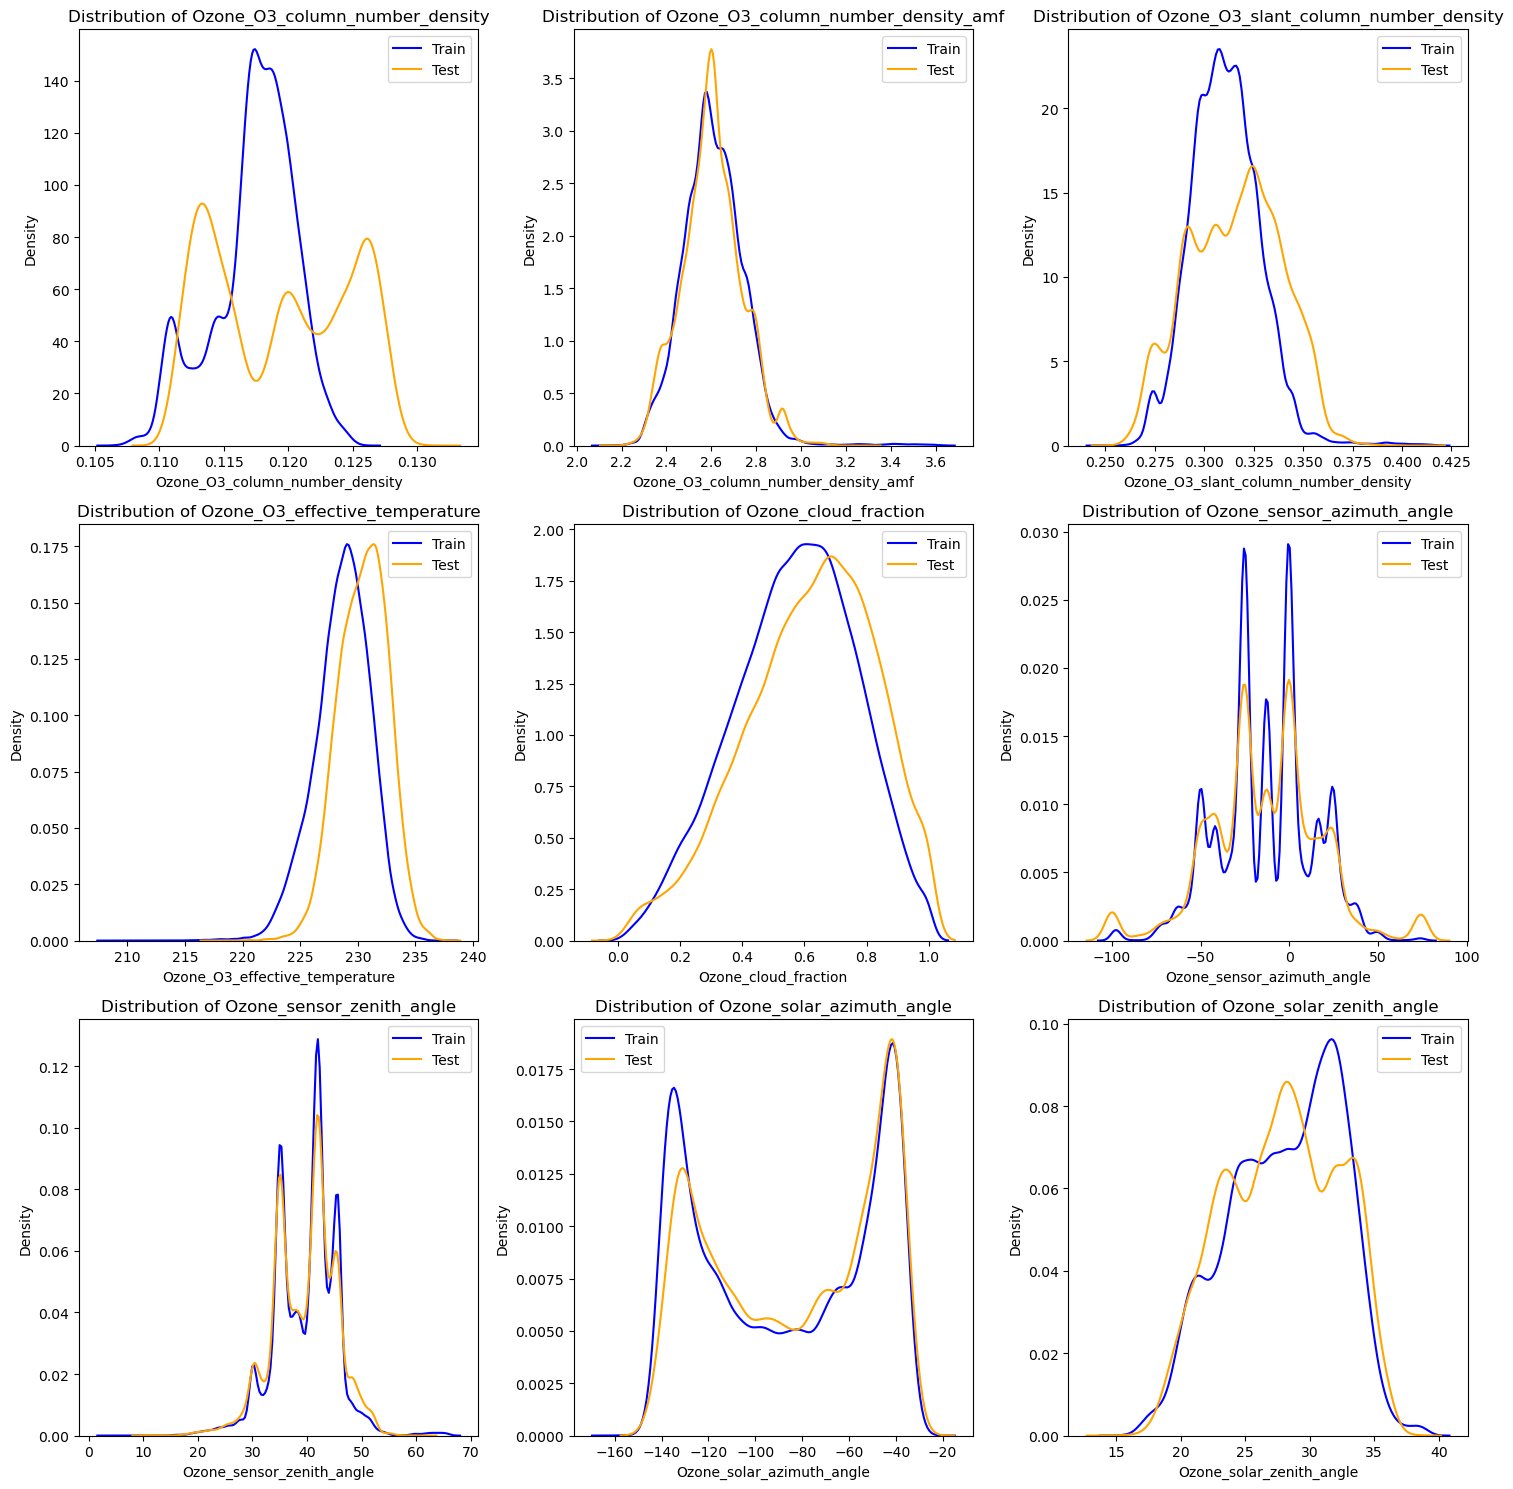

In [27]:
plot_kde_subplots(train_Ozone, test_Ozone)

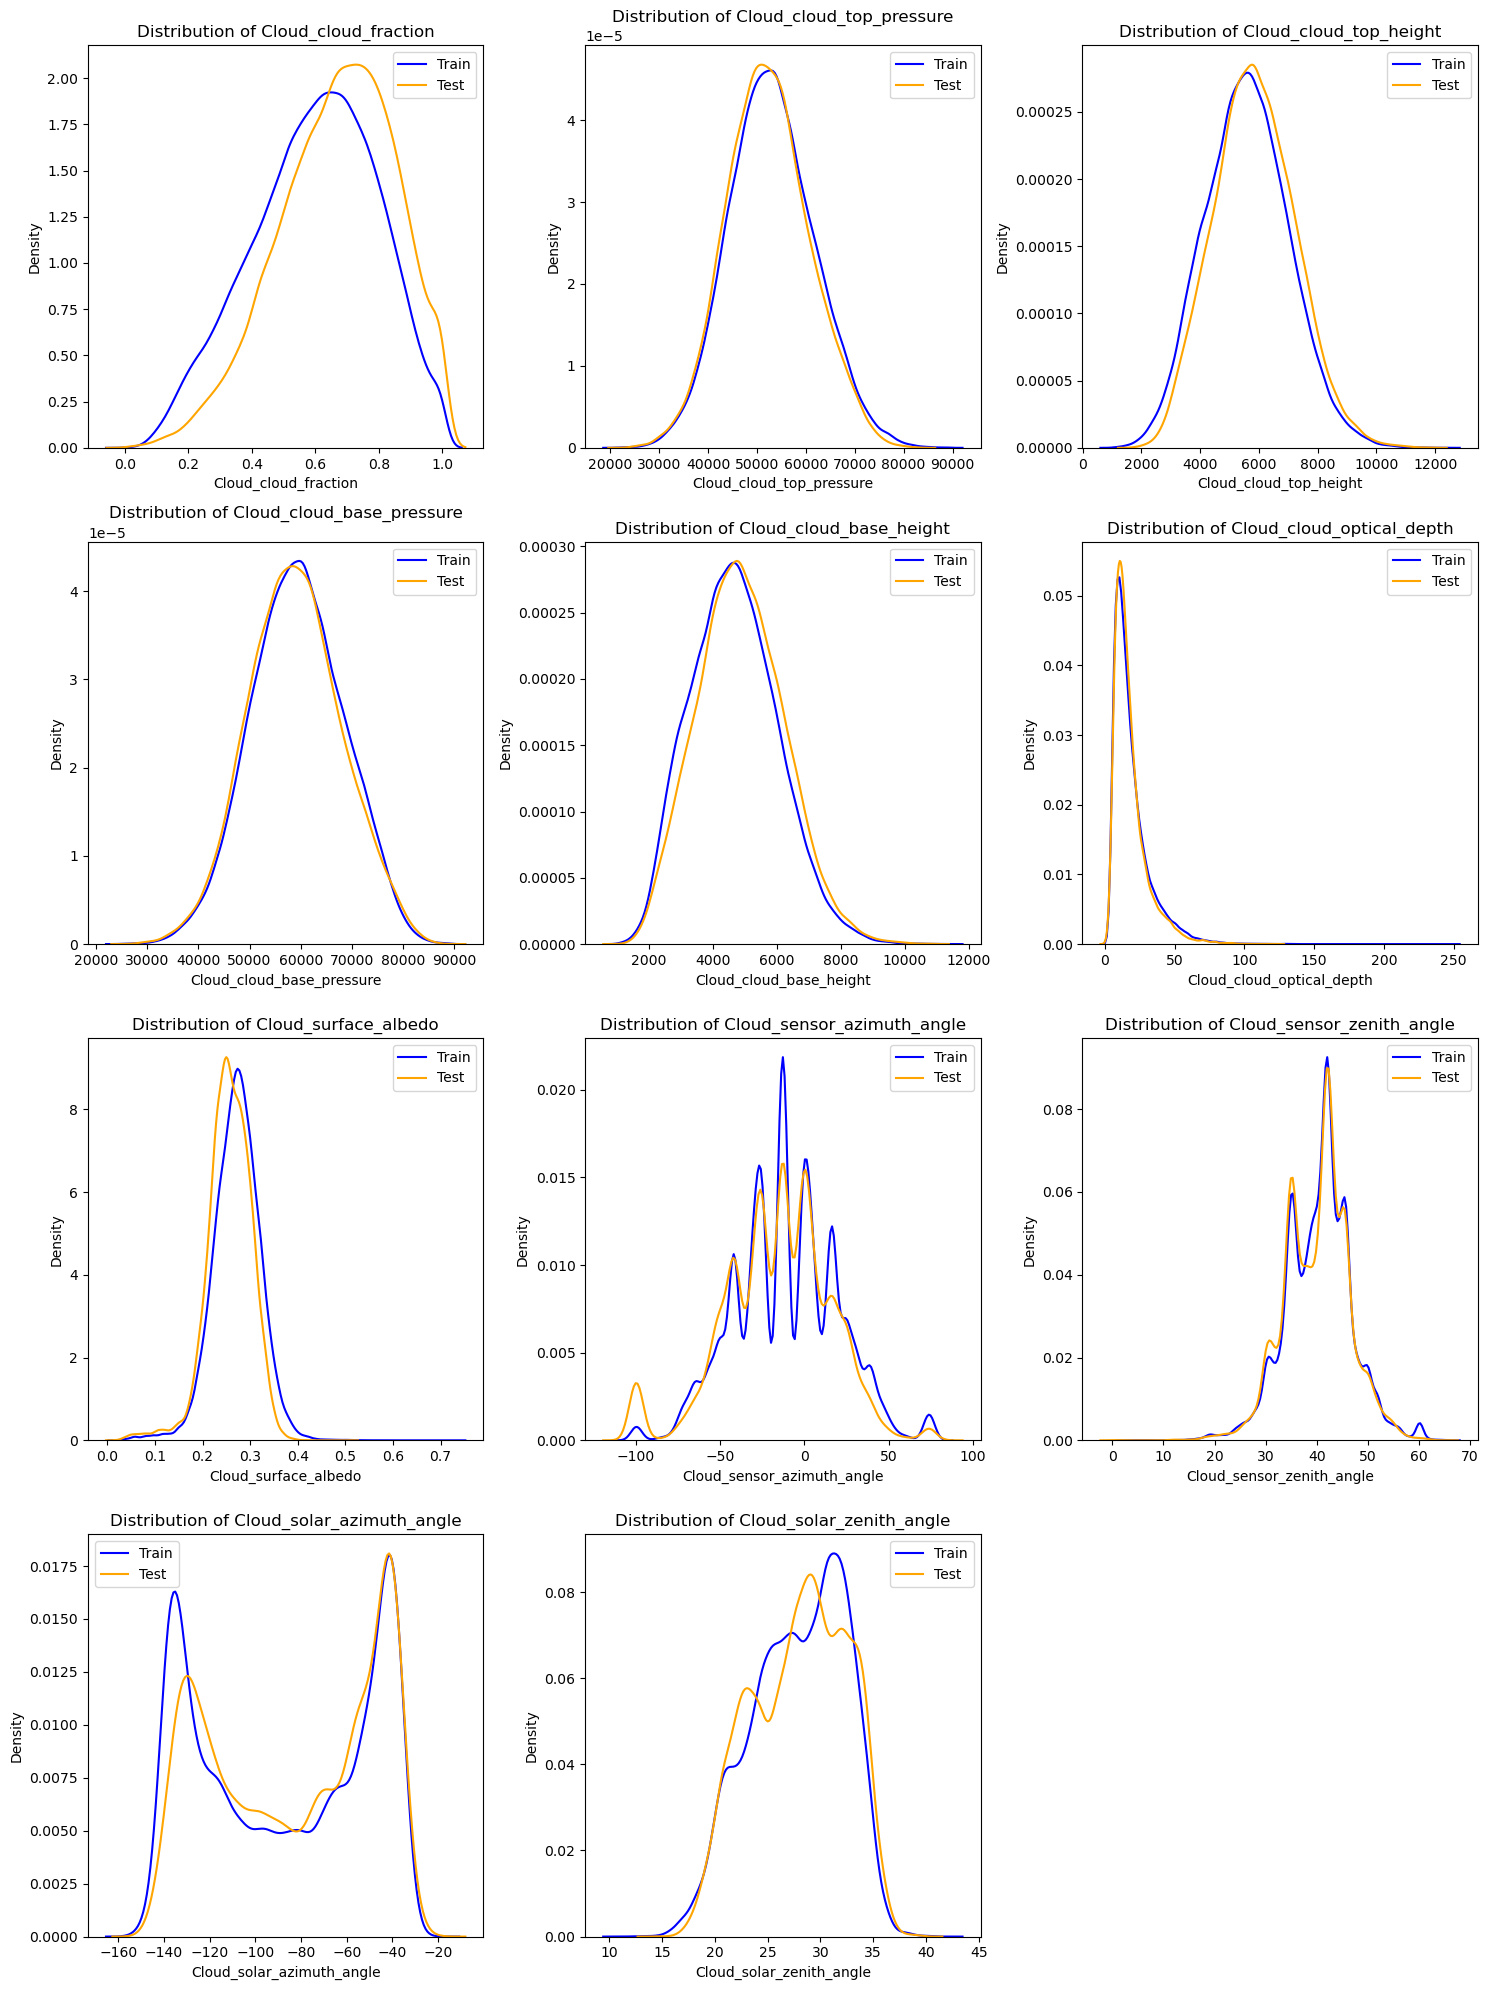

In [28]:
plot_kde_subplots(train_Cloud, test_Cloud)

Features such as "NitrogenDioxide", "Ozone", and "Cloud" shows some density variation in train and test data. Most of the features does't have much difference in train and test data.

In [29]:
def plot_histogram_subplots(a, b):
    num_columns = len(a.columns)
    num_rows = math.ceil(num_columns / 3)
    num_cols = 3 if num_columns > 1 else 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    if num_rows > 1:
        axes = axes.flatten()

    for idx, (i, j) in enumerate(zip(a.columns, b.columns)):
        ax = axes[idx]
        sns.histplot(data=a, x=i, color="purple", label="Train", ax=ax)
        sns.histplot(data=b, x=j, color="red", label="Test", ax=ax)
    
        ax.set_title(f"{i}")
        ax.set_xlabel(i)
        ax.set_ylabel("Frequency")
        ax.legend()
    
    for i in range(num_columns, num_rows * num_cols):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

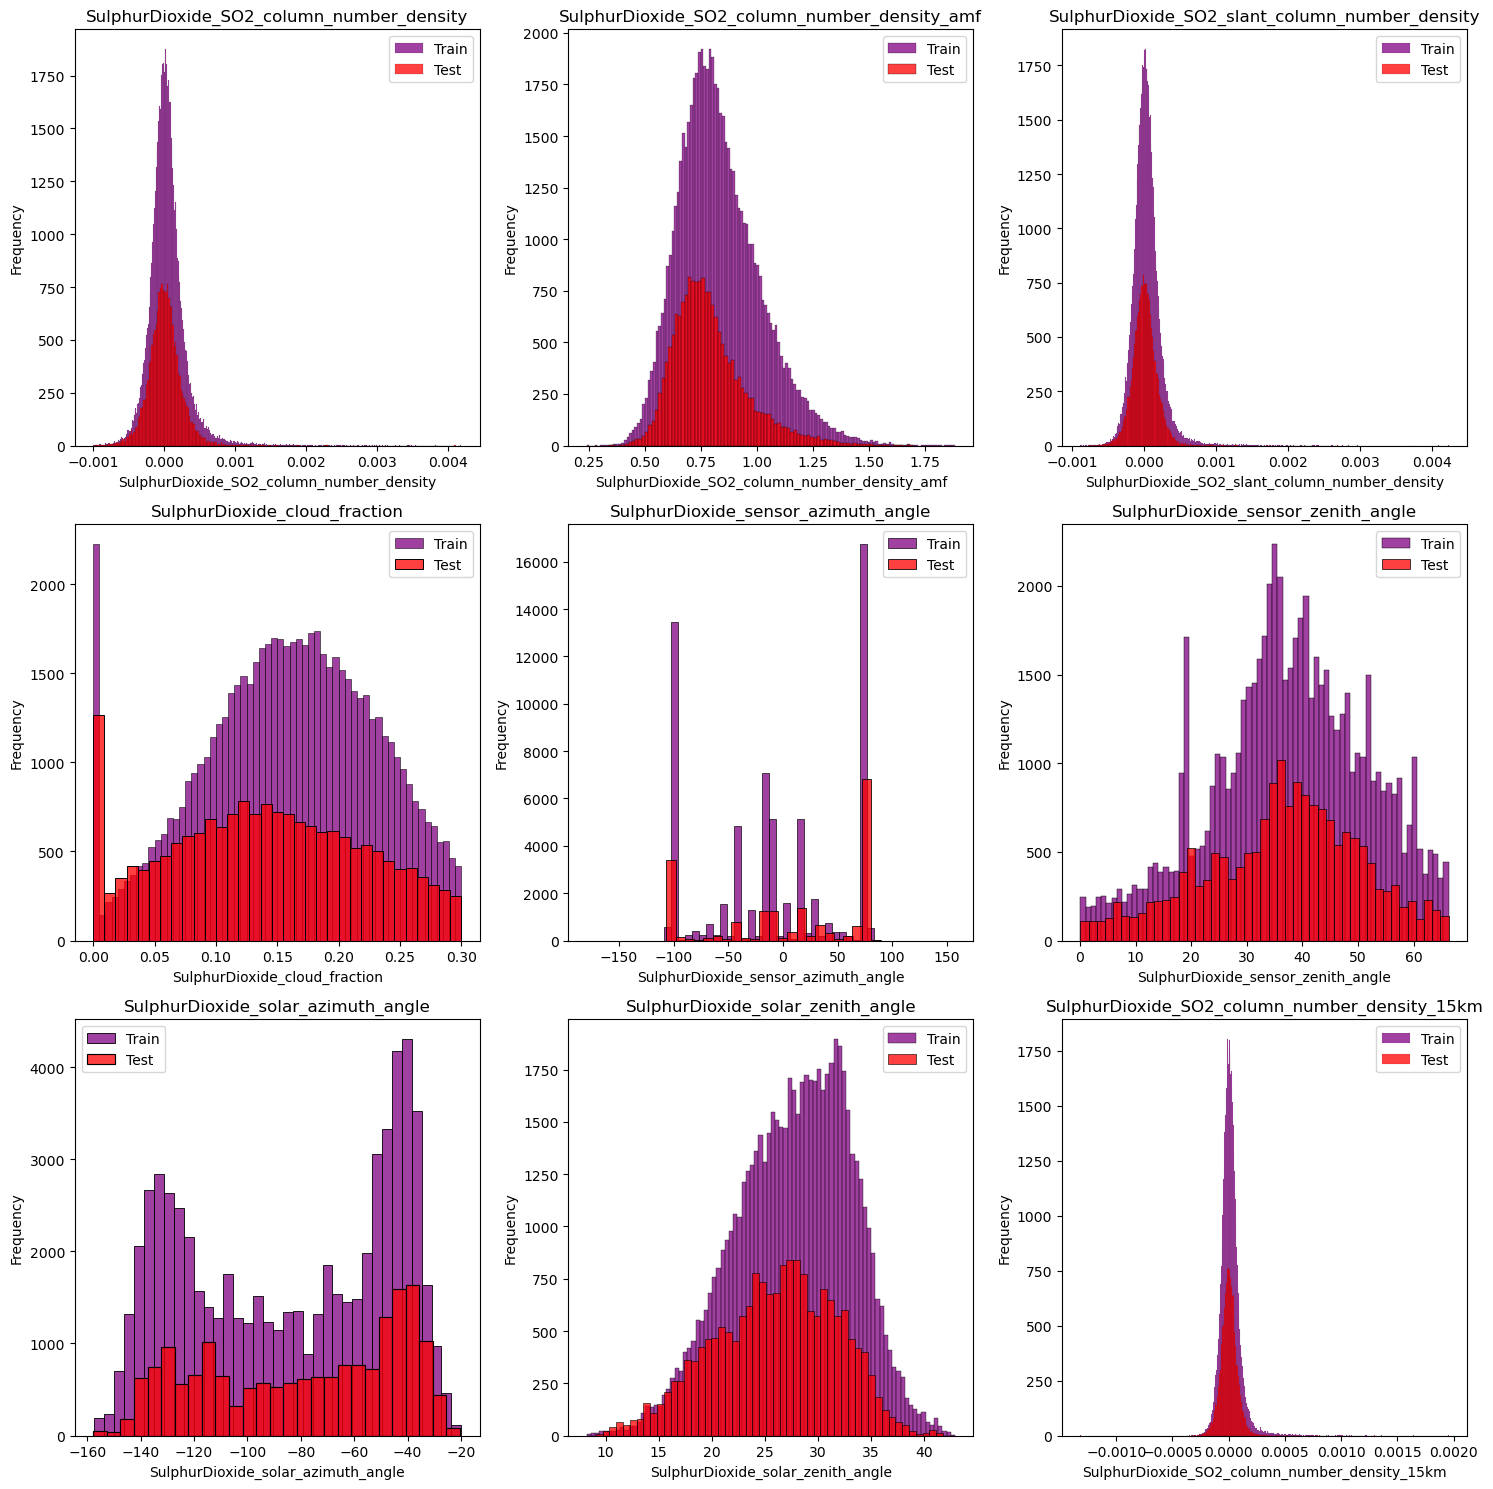

In [30]:
plot_histogram_subplots(train_SulphurDioxide, test_SulphurDioxide)

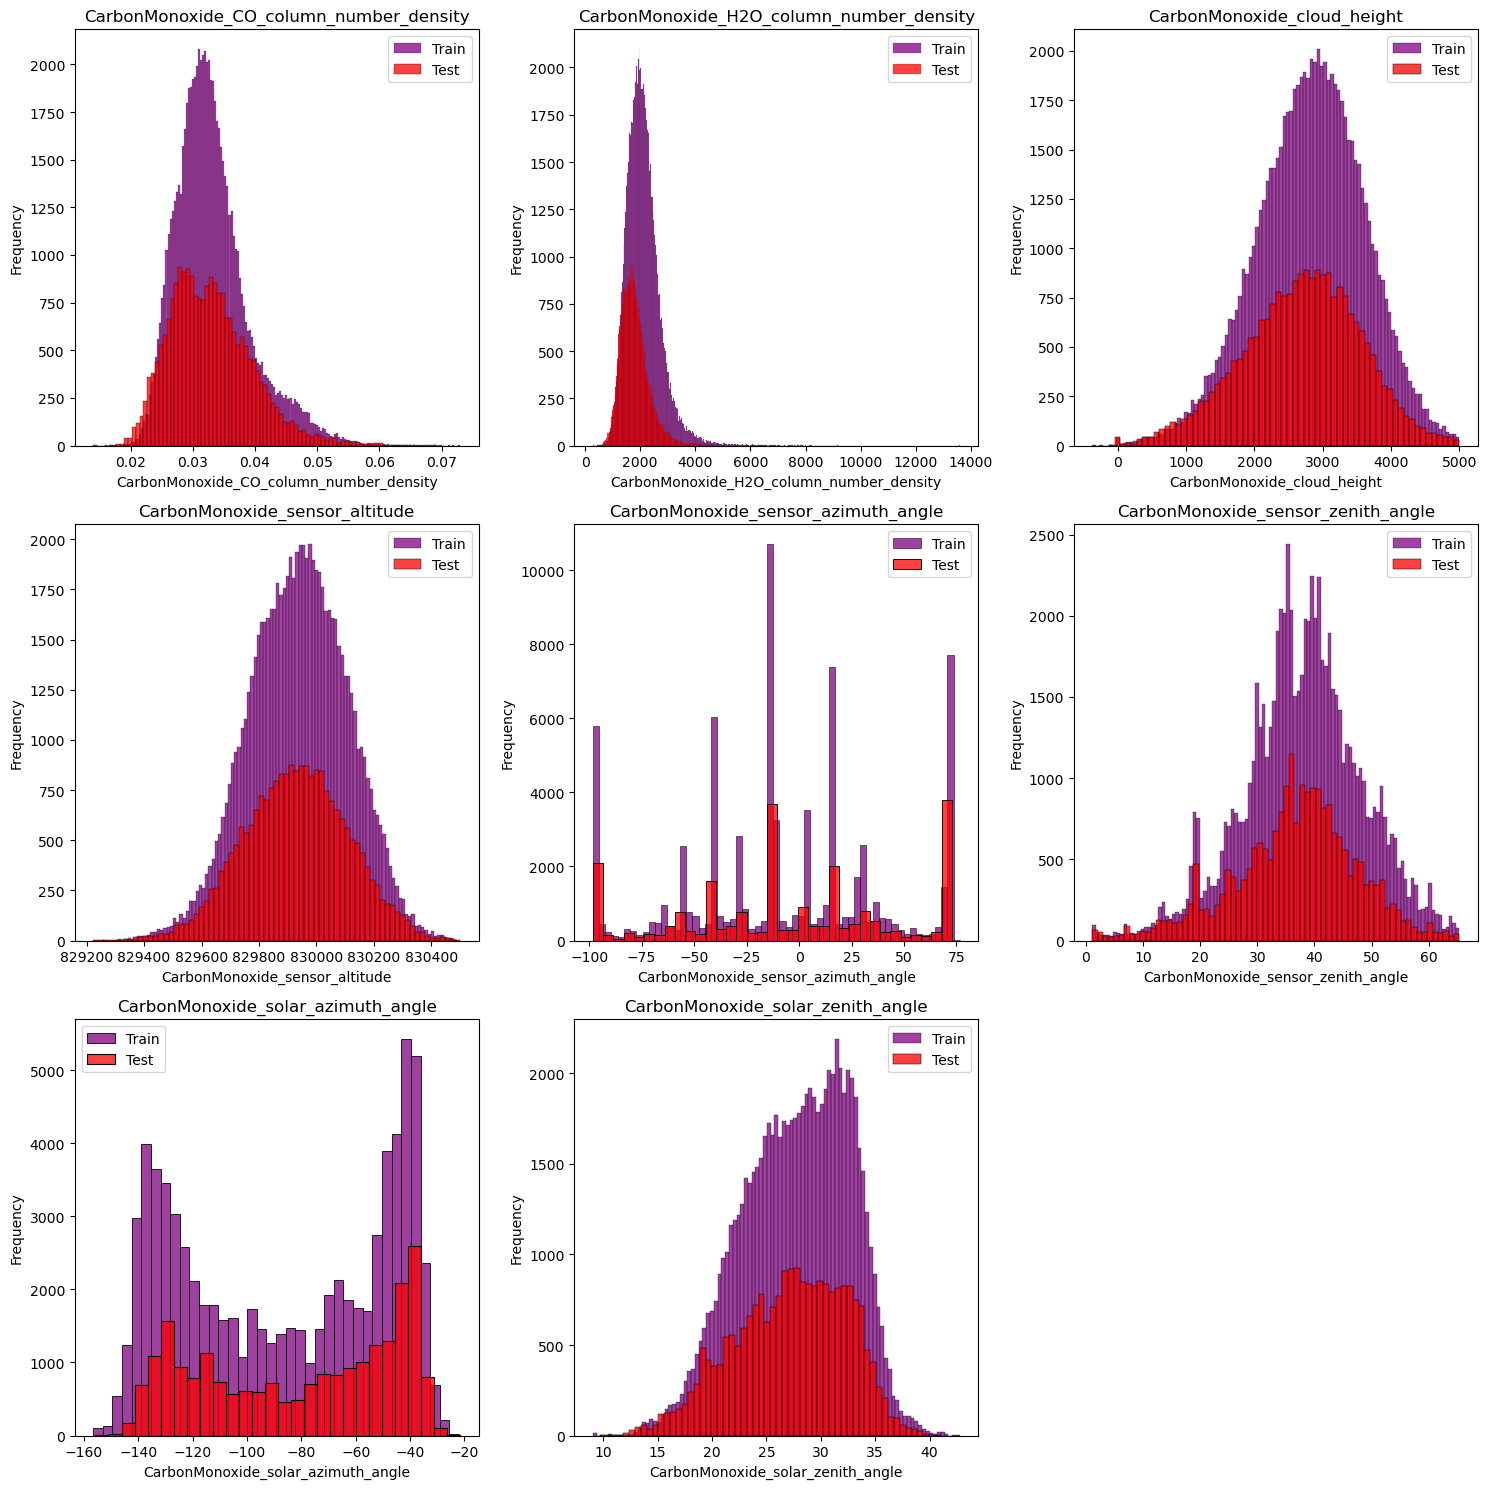

In [31]:
plot_histogram_subplots(train_CarbonMonoxide, test_CarbonMonoxide)


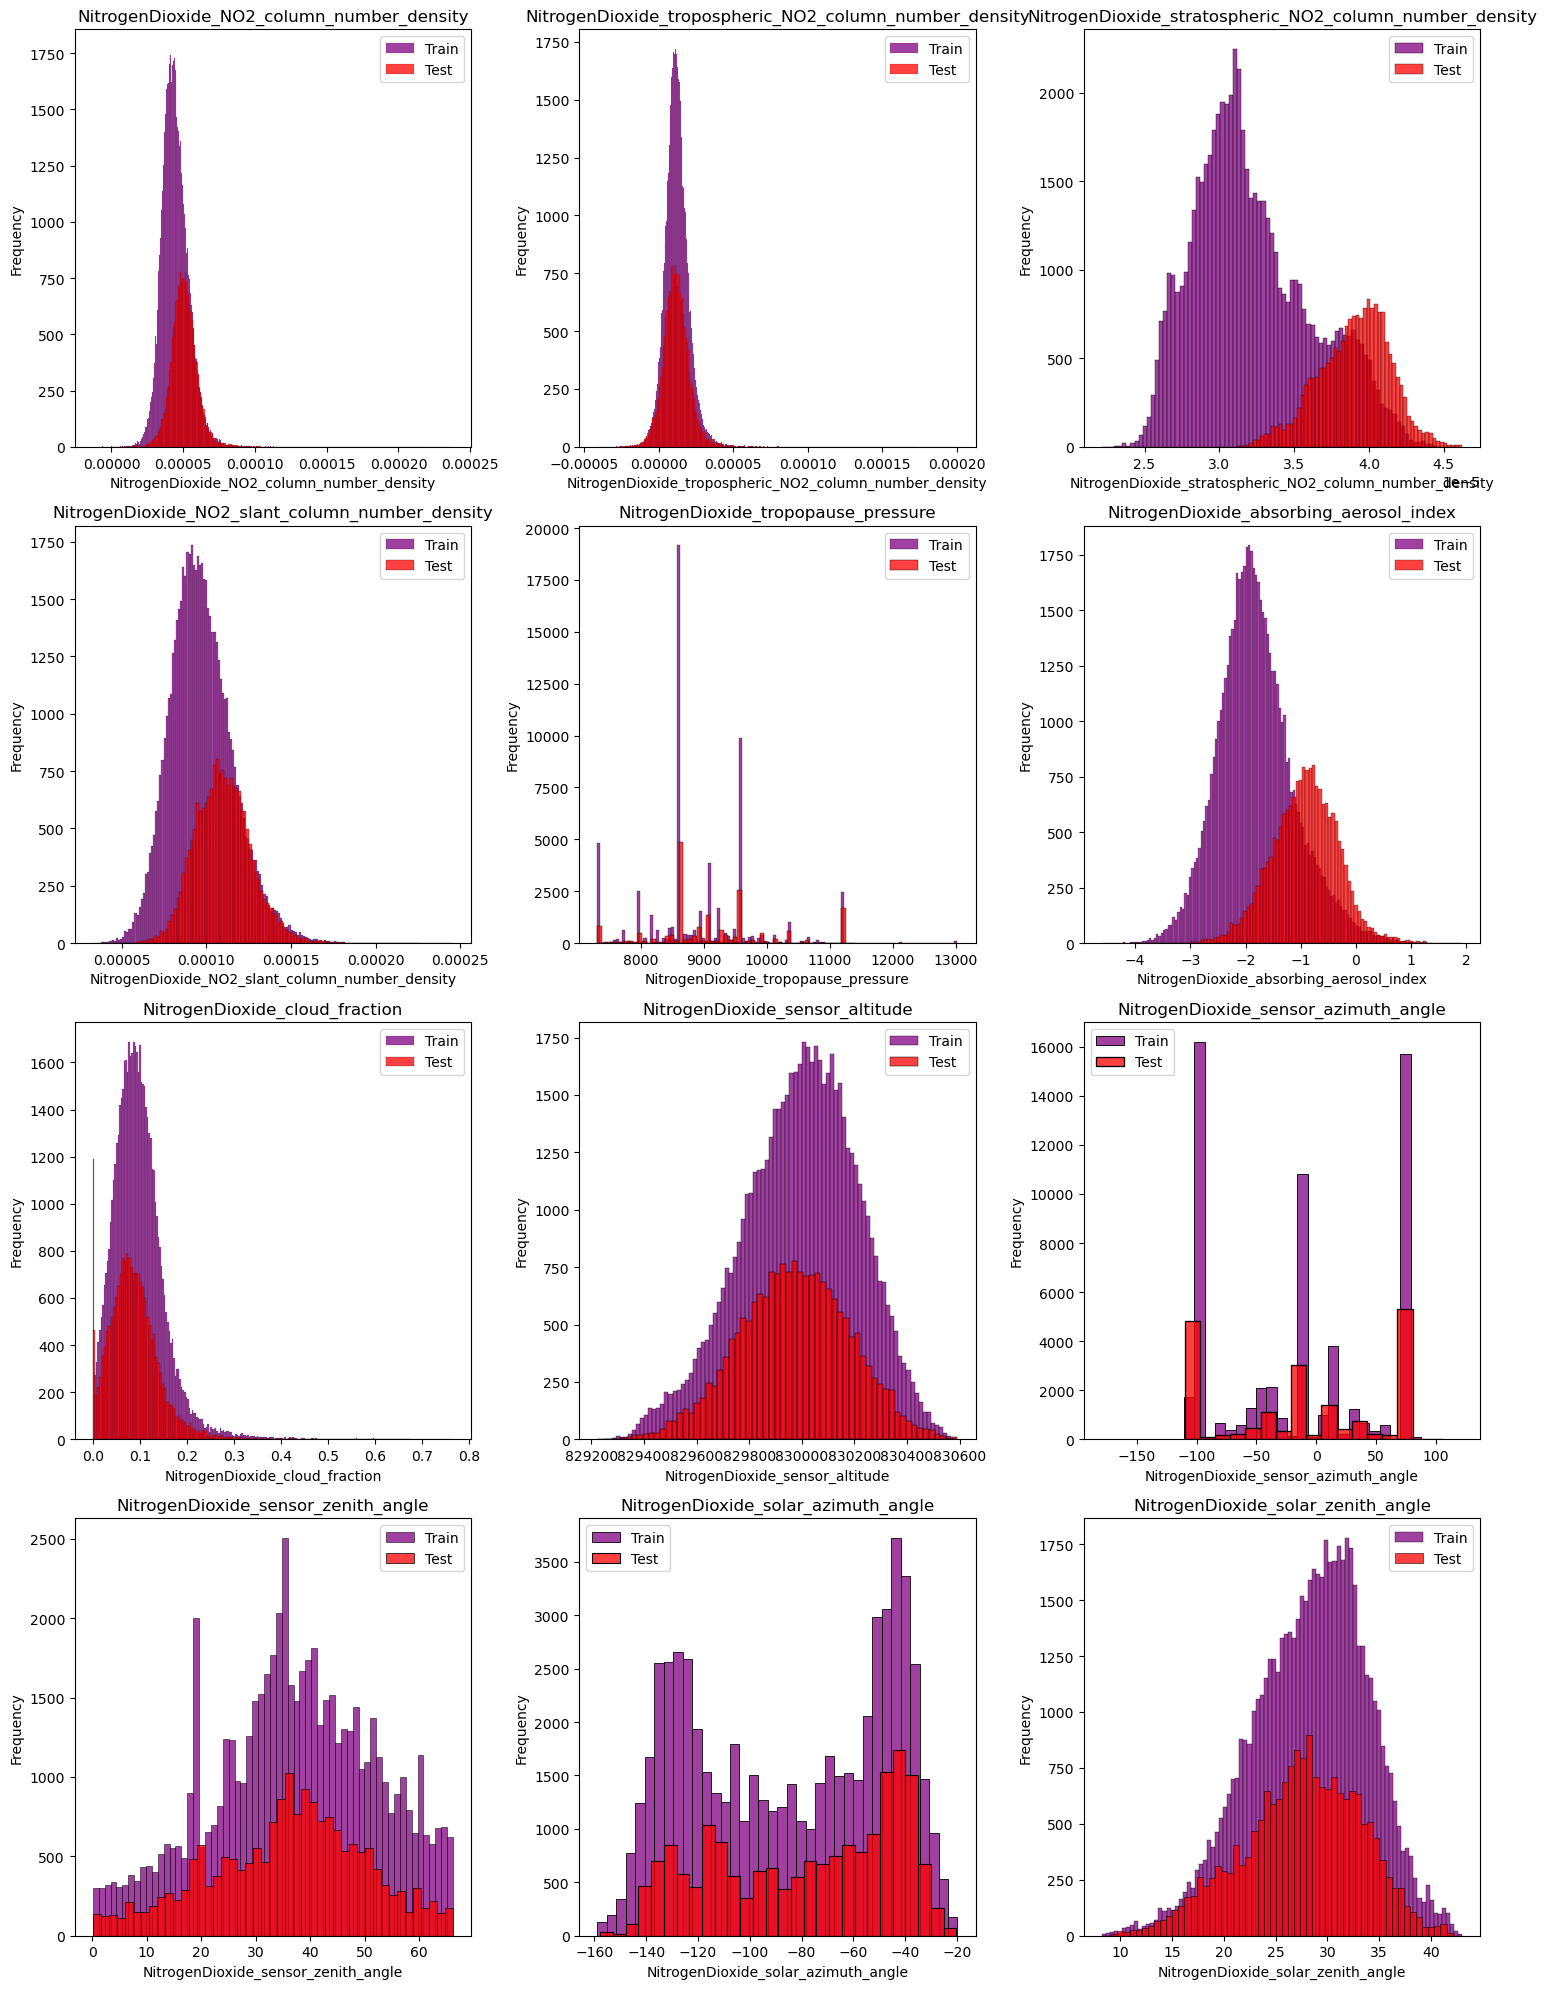

In [32]:
plot_histogram_subplots(train_NitrogenDioxide, test_NitrogenDioxide)

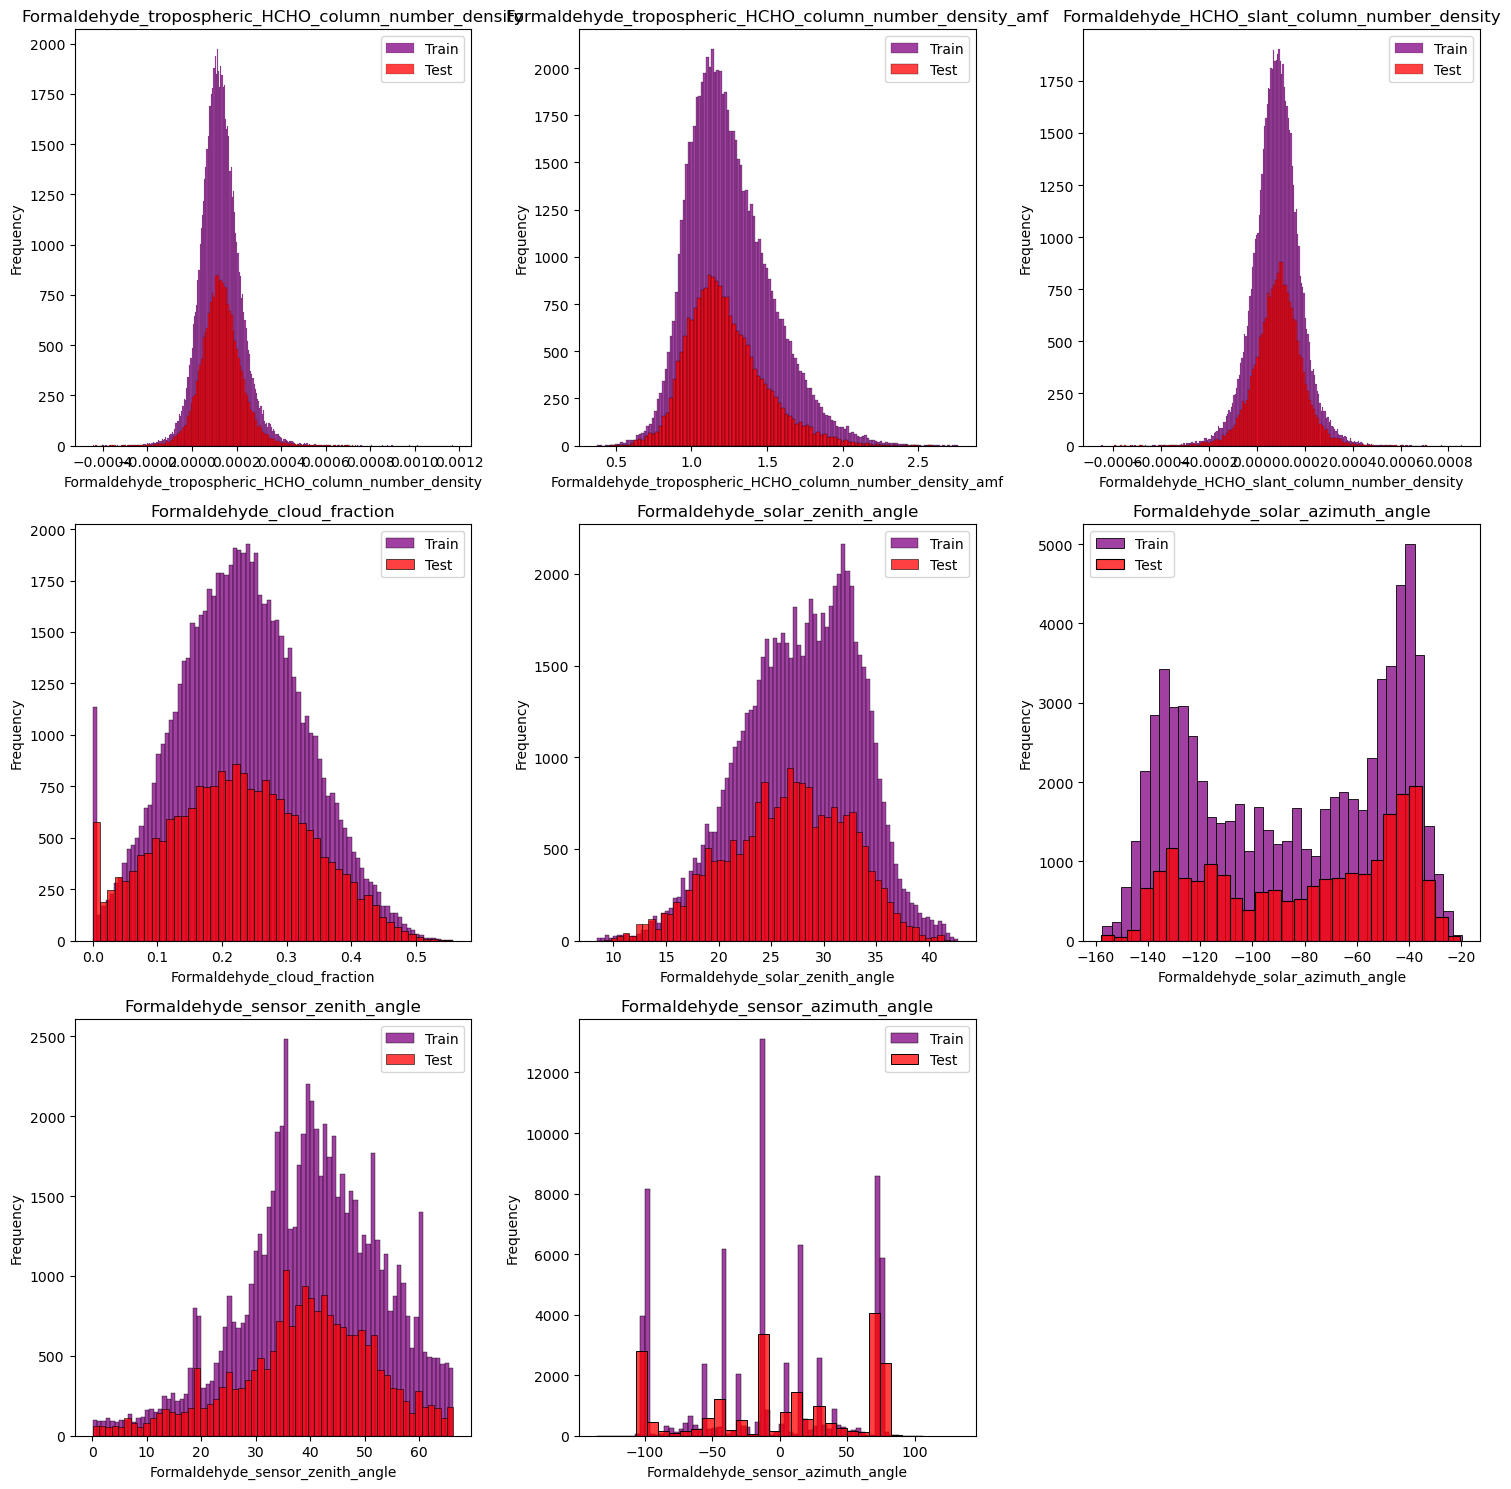

In [33]:
plot_histogram_subplots(train_Formaldehyde, test_Formaldehyde)

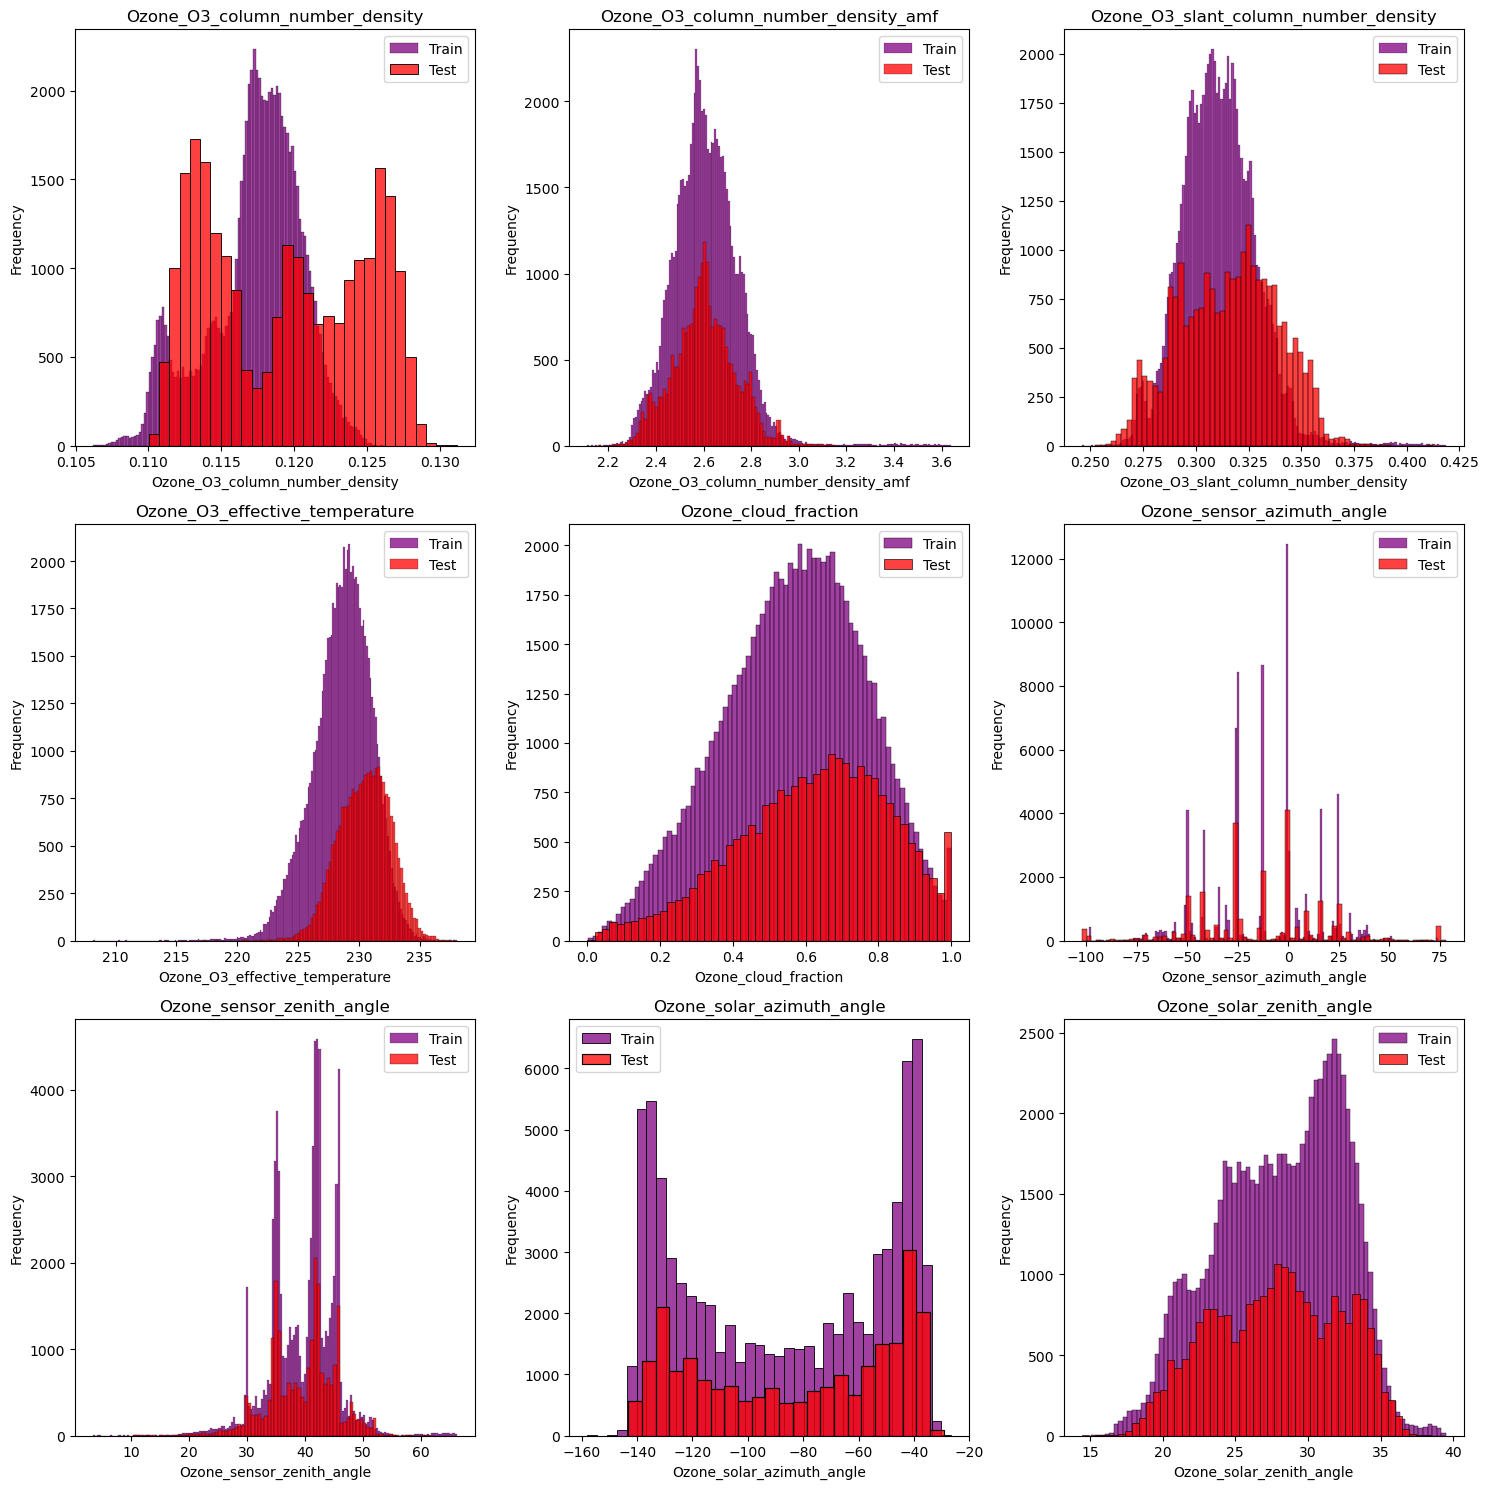

In [34]:
plot_histogram_subplots(train_Ozone, test_Ozone)

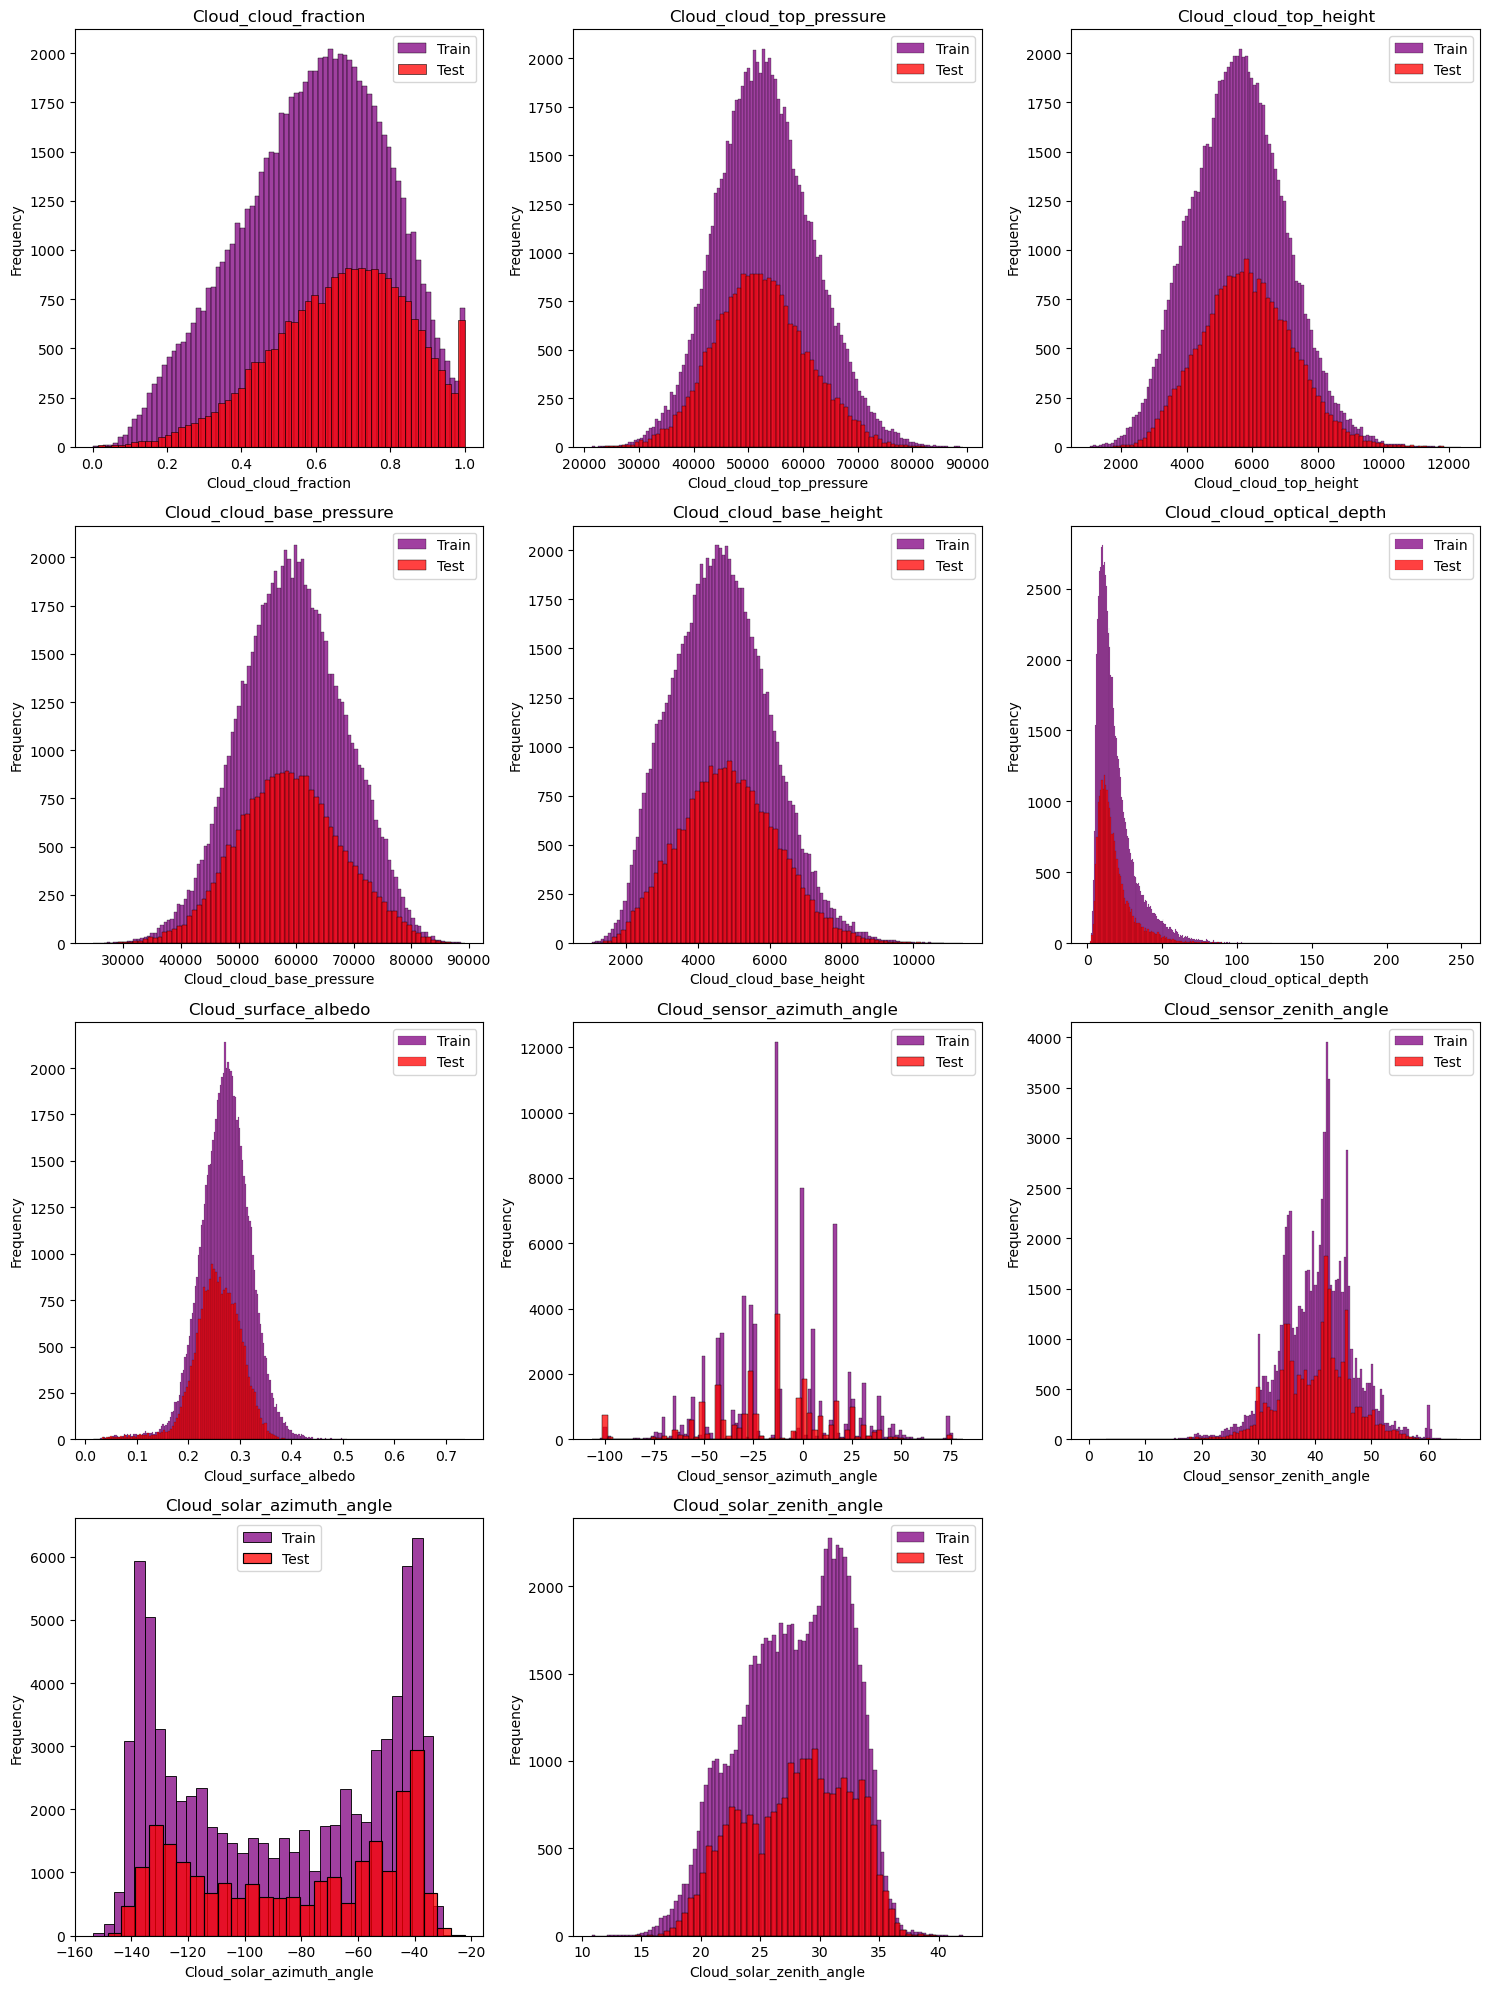

In [35]:
plot_histogram_subplots(train_Cloud, test_Cloud)


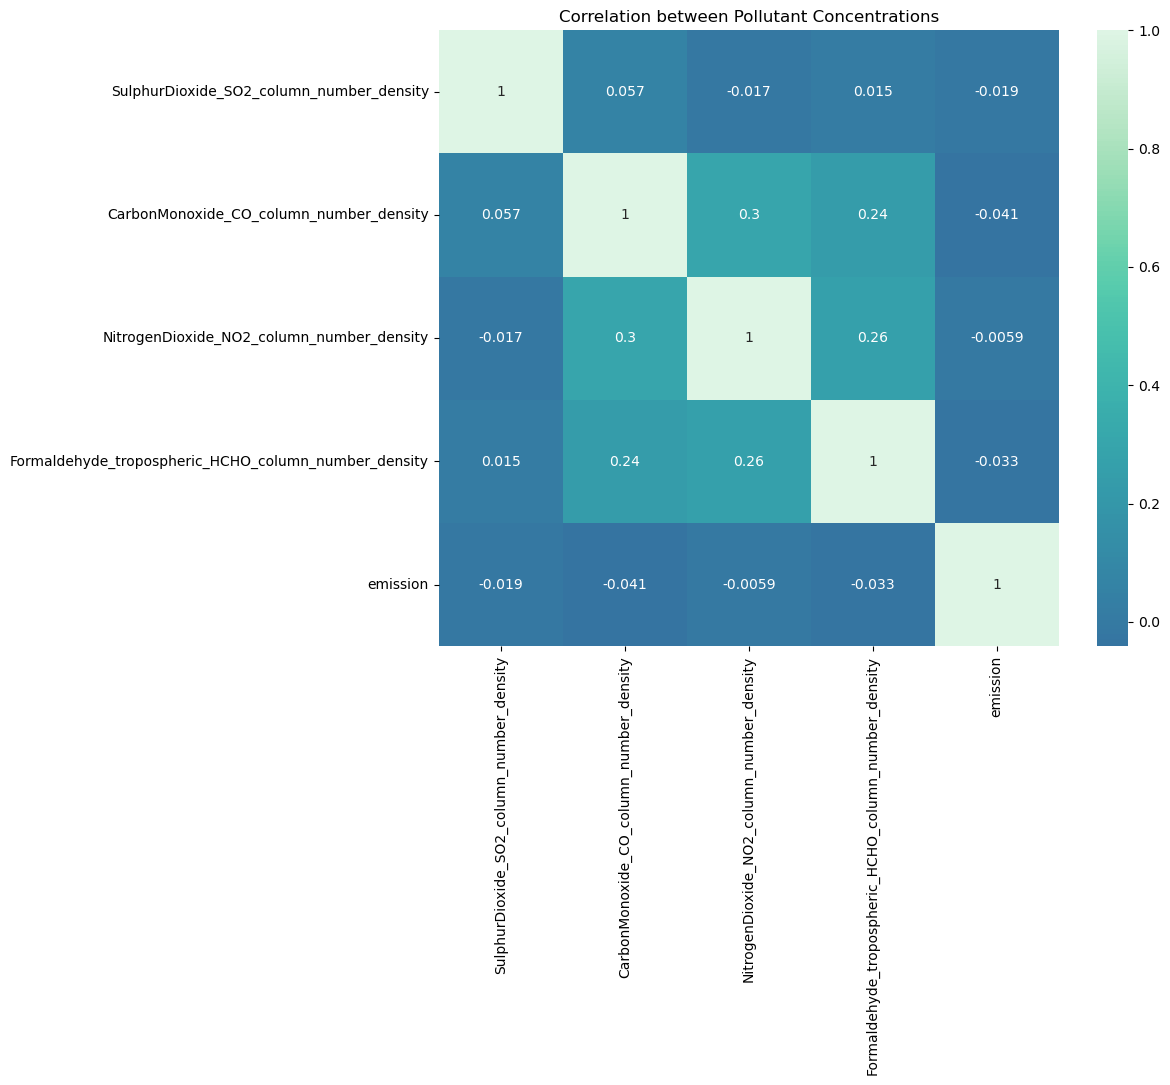

In [36]:
pollutant_columns = ['SulphurDioxide_SO2_column_number_density',
                     'CarbonMonoxide_CO_column_number_density',
                     'NitrogenDioxide_NO2_column_number_density',
                     'Formaldehyde_tropospheric_HCHO_column_number_density','emission']

pollutant_df = train[pollutant_columns]
correlation_matrix = pollutant_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', center=0)
plt.title('Correlation between Pollutant Concentrations')
plt.show()

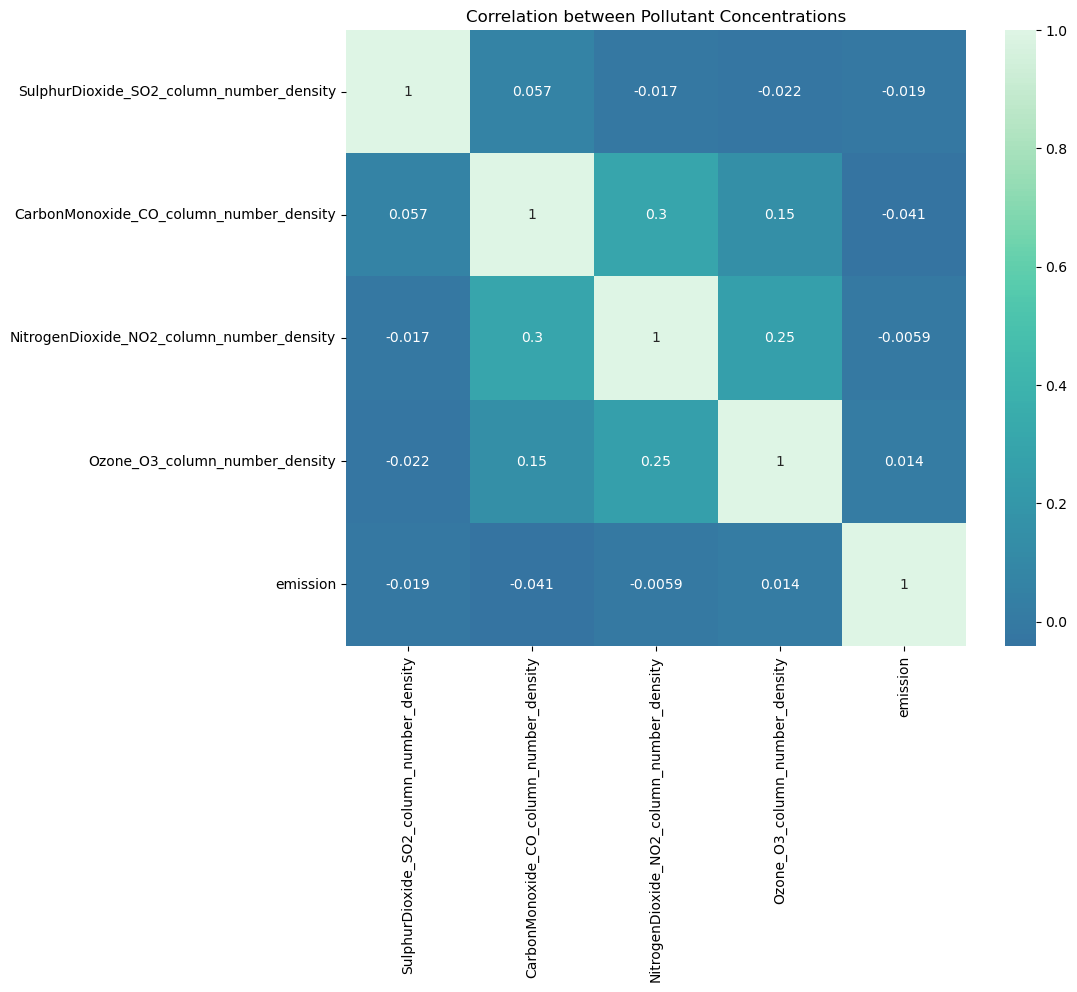

In [37]:
# Select columns related to pollutant concentrations
pollutant_columns = ['SulphurDioxide_SO2_column_number_density',
                     'CarbonMonoxide_CO_column_number_density',
                     'NitrogenDioxide_NO2_column_number_density',
                     'Ozone_O3_column_number_density',"emission"]

# Create a subset DataFrame with pollutant columns
pollutant_df = train[pollutant_columns]

# Calculate the correlation matrix
correlation_matrix = pollutant_df.corr()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', center=0)
plt.title('Correlation between Pollutant Concentrations')
plt.show()


The heatmap allows us to identify strong positive or negative correlations between different pollutant concentrations. Understanding these correlations can help in predicting how changes in one pollutant might impact others, enabling better pollution management strategies.

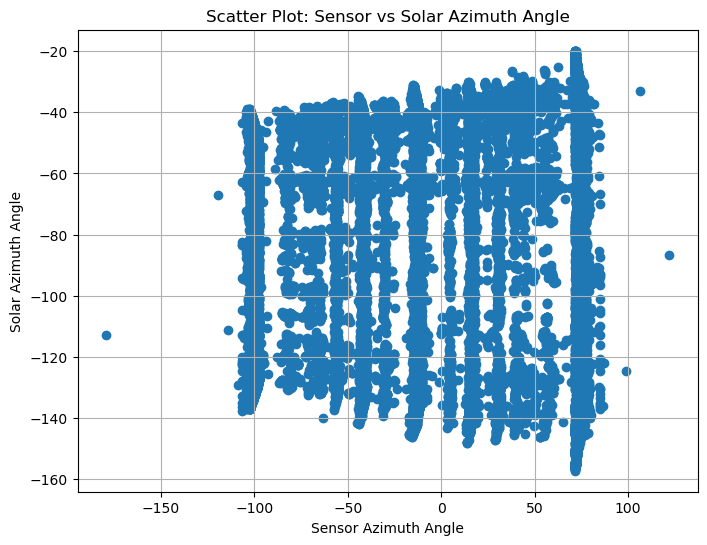

In [38]:
# Scatter plot between 'SulphurDioxide_sensor_azimuth_angle' and 'SulphurDioxide_solar_azimuth_angle'
plt.figure(figsize=(8, 6))
plt.scatter(train['SulphurDioxide_sensor_azimuth_angle'], train['SulphurDioxide_solar_azimuth_angle'])
plt.title('Scatter Plot: Sensor vs Solar Azimuth Angle')
plt.xlabel('Sensor Azimuth Angle')
plt.ylabel('Solar Azimuth Angle')
plt.grid(True)
plt.show()


The scatter plot matrix reveals how aerosol measurements relate to ozone measurements and vice versa. Insights from this visualization can aid in understanding potential connections between aerosol levels and ozone concentration, which are important for air quality assessments.

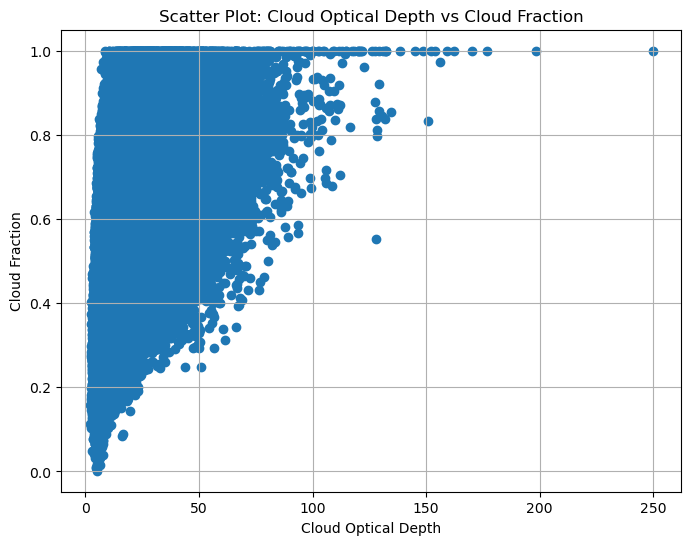

In [39]:
# Scatter plot between 'Cloud_cloud_optical_depth' and 'Cloud_cloud_fraction'
plt.figure(figsize=(8, 6))
plt.scatter(train['Cloud_cloud_optical_depth'], train['Cloud_cloud_fraction'])
plt.title('Scatter Plot: Cloud Optical Depth vs Cloud Fraction')
plt.xlabel('Cloud Optical Depth')
plt.ylabel('Cloud Fraction')
plt.grid(True)
plt.show()


The scatter plot helps us understand the relationship between cloud optical depth and cloud fraction. Insights from this plot can inform us about how these cloud properties interact and their potential impact on measurements.

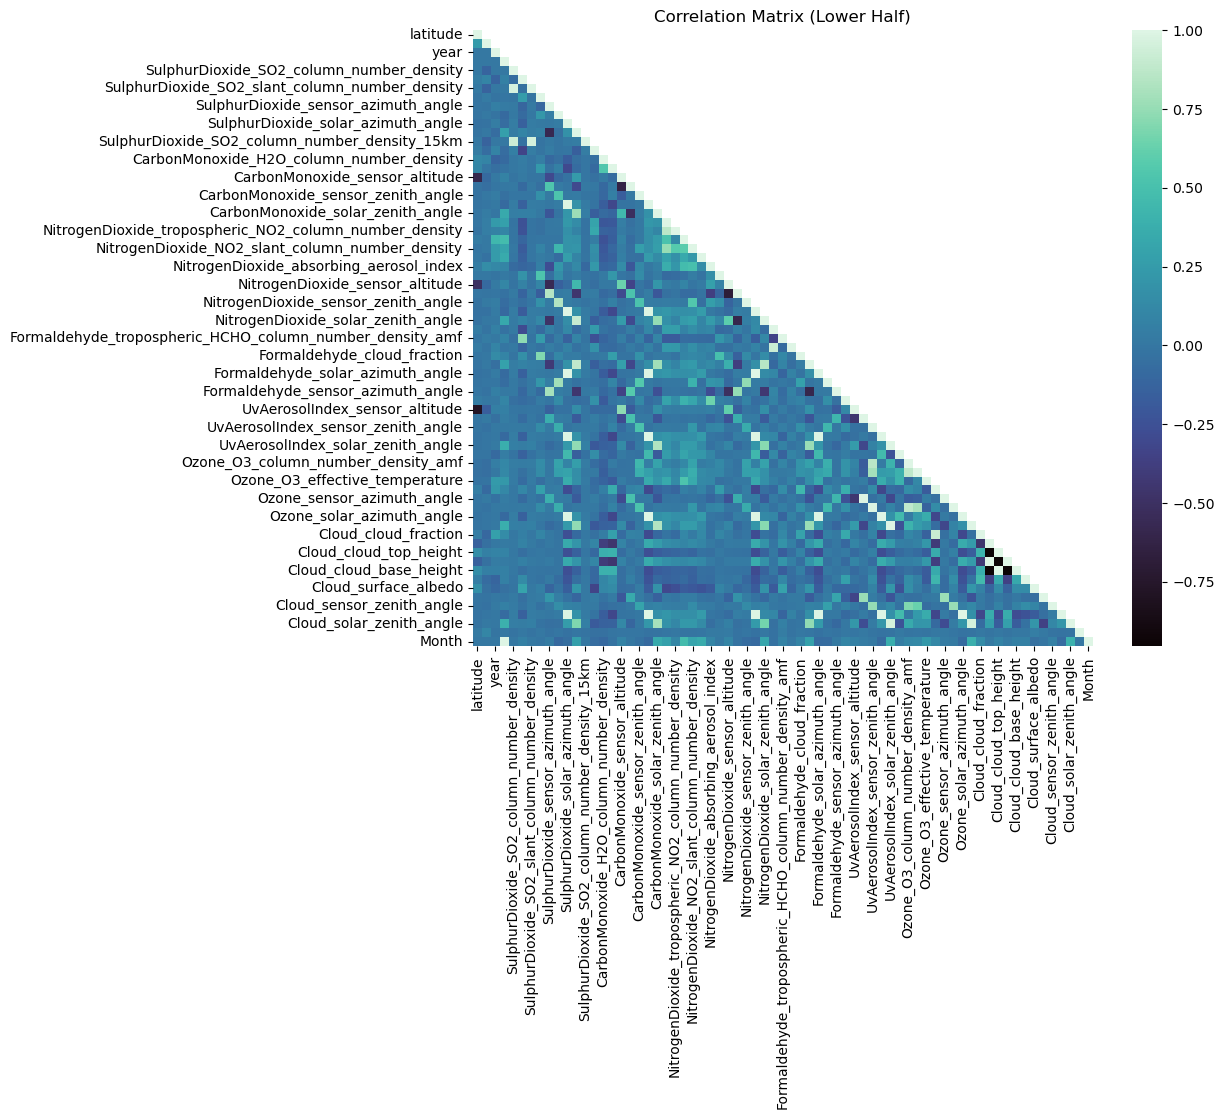

In [40]:
# Calculate the correlation matrix
correlation_matrix = train.corr()
mask = np.triu(np.ones(correlation_matrix.shape), k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='mako', mask=mask)
plt.title('Correlation Matrix (Lower Half)')
plt.show()


# Missing Value Imputation

Train and Test data has lots of missing data. Let's fill missing values using Iterative imputer.

In [41]:
train_df=train.drop(columns=["ID_LAT_LON_YEAR_WEEK","Date","coordinates","emission","Month"],axis=1)
test_df=test.drop(columns=["ID_LAT_LON_YEAR_WEEK","Date","coordinates","Month"],axis=1)

imputer = IterativeImputer(max_iter=5, random_state=7)  

imputed_train = imputer.fit_transform(train_df)
train_imputed_df = pd.DataFrame(imputed_train, columns=train_df.columns)

imputed_test = imputer.transform(test_df)
test_imputed_df = pd.DataFrame(imputed_test, columns=test_df.columns)

# Feature Importance

The data has more that 70 features. I use ExtraTreeRegressor model to check the importance of feature which is more suitable for model which helps to make correct emission.

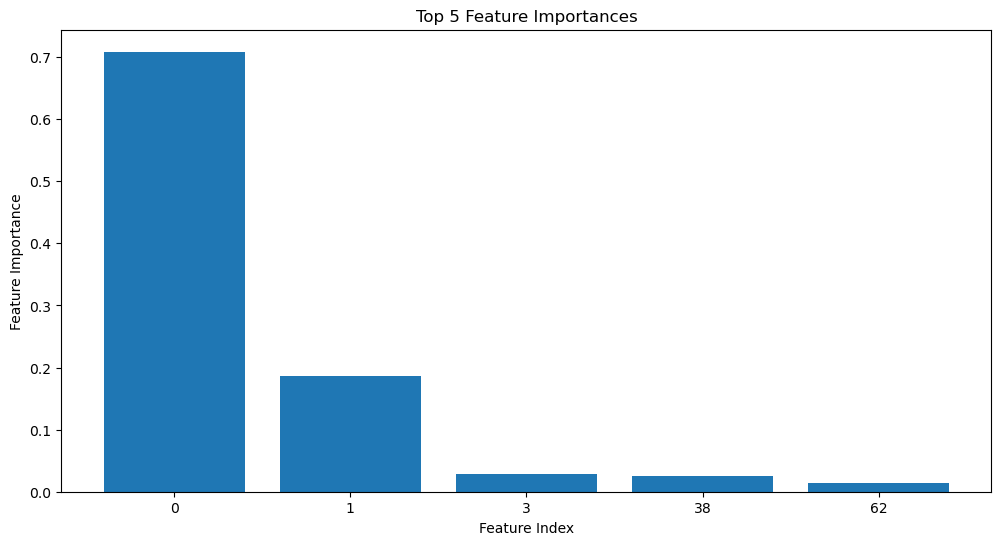

In [42]:
x=train_imputed_df.copy()
y=train["emission"]

# Create and fit the ExtraTreeRegressor model
forest = ExtraTreeRegressor(random_state=7)
forest.fit(x, y)

importances = forest.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

top_feature_indices = sorted_indices[:5]
top_feature_importances = importances[top_feature_indices]

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_feature_indices)), top_feature_importances, align='center')
plt.xticks(range(len(top_feature_indices)), top_feature_indices)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Top 5 Feature Importances')
plt.show()


As we can see that, there are two features which has more importance than any other feature. Still let's go with top 5 imprtant features.

Let's split data for train and validation of model.

In [43]:
x_train= x[x.columns[top_feature_indices]]
x_train,x_val, y_train, y_val= train_test_split(x_train, y,test_size=0.2, random_state=7)
test_x=test_imputed_df[x.columns[top_feature_indices]]

# Modeling

I consider one of the most Popular Random Forest model to predict CO2 emission.

In [44]:
model = RandomForestRegressor(
    n_estimators=100,     
    max_features='auto',  
    random_state=7
)

In [45]:
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"RMSE on validation set: {rmse}")

RMSE on validation set: 18.631870707290354


In [46]:
test_predictions = model.predict(test_x)

# Submission 

In [47]:
# Create a new DataFrame for submission
submission_data = pd.DataFrame({
    "ID_LAT_LON_YEAR_WEEK": test["ID_LAT_LON_YEAR_WEEK"],
    "emission": test_predictions
})

# Save the submission data to a CSV file
submission_data.to_csv("submission.csv", index=False)


In [48]:
submission_data.head()

ID_LAT_LON_YEAR_WEEK  emission
0  ID_-0.510_29.290_2022_00  4.003820
1  ID_-0.510_29.290_2022_01  3.964897
2  ID_-0.510_29.290_2022_02  4.186105
3  ID_-0.510_29.290_2022_03  4.035367
4  ID_-0.510_29.290_2022_04  4.015043

## Thank You!